# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

В данном проекте нужно определить рыночную стоимость объектов недвижимости и установить какие параметры больше всего на это влияют. Для этого в проекте необходимо решить несколько задач: 
1. необходимо проанализировать основные параметры объектов и выделить их основные характеристики;
2. проанализировать скорость продажи квартир и выделить продажи, которые можно назвать быстрыми и долгими;
3. проанализировать, какие факторы имели наибольшее влияние на стоимость объекта;
4. рассчитать среднюю цену 1 кв. метра в 10 населённых пунктах с наибольшим числом объявлений;
5. вычислить среднюю цену каждого километра до центра города для объектов в Санкт-Петербурге.

Для решения этих задач необходимо провести следующие работы с данными:
1. познакомится с данными: изучение датафрейма, построение гистограмм;
2. обработать данные: изучение и обработка пропущенных значений, работа с типами данных, поиск и устранение явных и неявных дубликатов
3. добавить новые столбцы в датафрейм для удобства анализа.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#подсчёт количества дубликатов
data.duplicated().sum()

0

В данном датафрейме нет явных дубликатов.

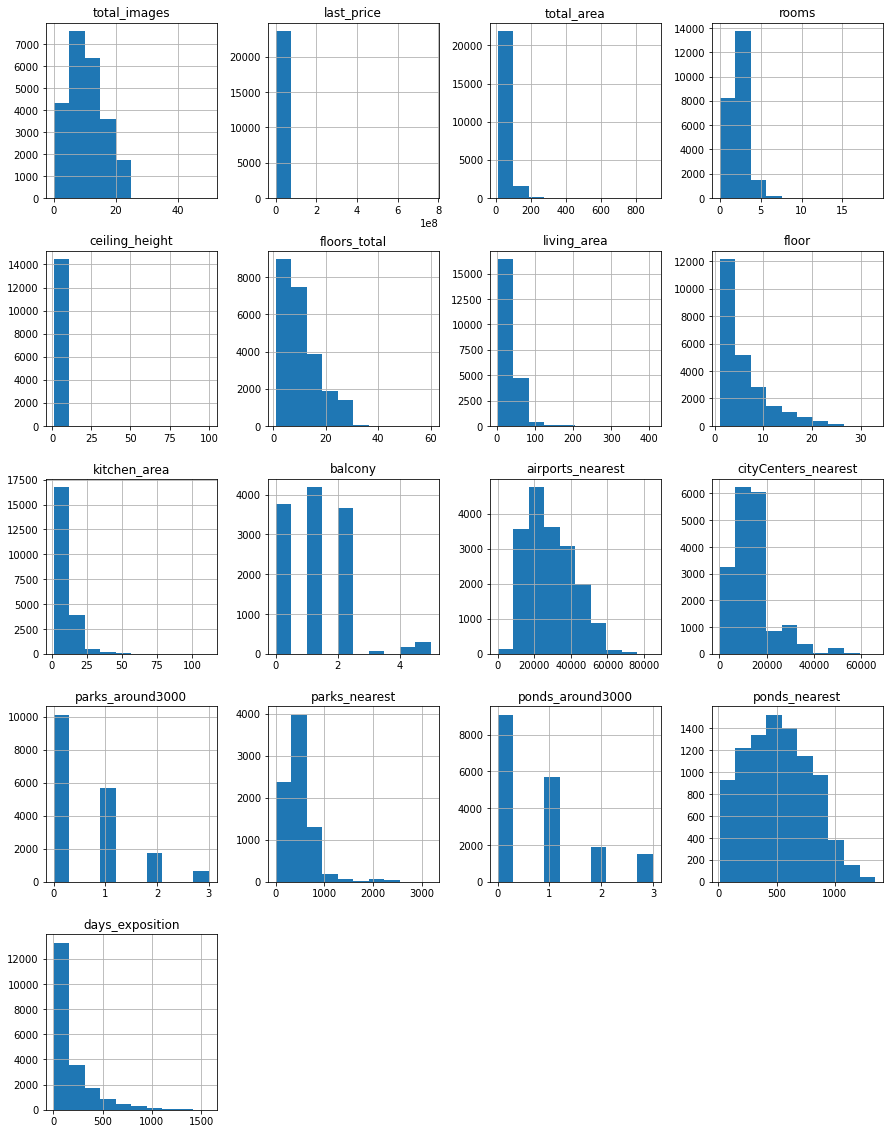

In [6]:
#строим гистограммы
data.hist(figsize=(15,20));

Вывод: В датафрейме 23 699 строк и 22 столбца. Некоторые данные имеют некорректный тип. Название одного из столбцов выбивается из общего стиля. Практически во всех столбцах есть пропущенные значения. По гистограммам видно, что присутствуют и аномальные значения, на которые нужно будет обратить внимание.

### Выполните предобработку данных

In [7]:
#найдём количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
#переименуем столбец, чтобы название соответствовало стилю
data= data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [11]:
#проверим переименование столбца
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [12]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [14]:
#пропущенные значения в столбце 'floors_total' заменим на медианнные 
data['floors_total'] = data['floors_total'].fillna(value=data['floors_total'].median())
print(data)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70 

In [15]:
print(data.query('floors_total < floor'))

       total_images  last_price  total_area first_day_exposition  rooms  \
457               4   9788348.0       70.80  2015-08-01T00:00:00      2   
2392              7   5395770.0       53.00  2017-06-29T00:00:00      2   
2846              4   2325000.0       27.80  2016-09-21T00:00:00      1   
3031              9   6400000.0       56.70  2018-03-27T00:00:00      2   
3438             10   4100000.0       38.00  2018-04-14T00:00:00      1   
4617              4   4275062.0       61.20  2017-04-27T00:00:00      2   
4848             15  13000000.0       98.00  2017-02-08T00:00:00      3   
5146             10   3085024.0       33.33  2018-10-06T00:00:00      1   
5187              5   3300000.0       25.40  2018-11-02T00:00:00      0   
5784              4   4262941.0       59.90  2017-04-02T00:00:00      2   
5958              1   3200000.0       30.30  2018-09-07T00:00:00      0   
6030              3  10900000.0      116.23  2017-05-05T00:00:00      4   
7922              3   542

In [16]:
#произведём замену 
for i in range(len(data)):
    if data.loc[i, 'floor'] > data.loc[i, 'floors_total']:
        data.loc[i, 'floor'] = data.loc[i, 'floors_total']

In [17]:
#проверим условие ещё раз
print(data.query('floors_total < floor'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Ошибки при заполнении пропусков медианными значениями в столбце 'floors' были устранены. Там, где значение этажа превышало этажность дома, оно было заменено на значение, равное последнему этажу.

In [18]:
#пропущенные значения в столбце 'ceiling_height' заменим на медианнные 
#data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

In [19]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Чтобы избежать и сохранить разнообразие , можно заменить пропуски медианными значениями по расстоянию до центра города. 

In [20]:
def city_centre(row):
    try:
        if row['city_centers_nearest'] < 3000:
            return 'центральный район'
        elif 30001 < row['city_centers_nearest'] < 5000:
            return 'близко к центру'
        elif 5001 < row['city_centers_nearest'] <15000:
            return 'спальный район'
        else:
            return 'далеко от центра'
    except:
        pass

In [21]:
data['distance_from_city'] = data.apply(city_centre, axis=1) 

In [22]:
data[['locality_name', 'city_centers_nearest','distance_from_city']].head()

,locality_name,city_centers_nearest,distance_from_city
0,Санкт-Петербург,16028.0,далеко от центра
1,посёлок Шушары,18603.0,далеко от центра
2,Санкт-Петербург,13933.0,спальный район
3,Санкт-Петербург,6800.0,спальный район
4,Санкт-Петербург,8098.0,спальный район


In [23]:
# Заполняем пропуски медианой по отдалённости от центра
data['ceiling_height'] = data.groupby('distance_from_city')['ceiling_height'].apply(
    lambda x: x.fillna(x.median()) if not x.isna().all() else x.fillna(value=data['ceiling_height'].median())
    )

In [24]:
# Заполняем пропуски медианой по типу зданий
#data['ceiling_height'] = data.groupby('floors_total')['ceiling_height'].apply(
    #lambda x: x.fillna(x.median()) if not x.isna().all() else x.fillna(value=data['ceiling_height'].median())
#)

In [25]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.716850
std          0.990305
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Мы видим, что максимальное значение высоты потолков - 100 метров. Такого быть, конечно же, не может.

In [26]:
#роверим, нет ли других "нереальных" значений
data['ceiling_height'].sort_values(ascending=False)

22869    100.00
3148      32.00
22336     32.00
21377     27.50
21824     27.00
          ...  
19329      2.00
2572       2.00
16934      1.75
5712       1.20
22590      1.00
Name: ceiling_height, Length: 23699, dtype: float64

Мы видим, что некоторые другие значения также содержат явные ошибки и не соответствуют реальности. Но это больше похоже на ошибку при записи данных, чем на аномальные значения. Я думаю, что эти данные стоит исправить самостоятельно.

In [27]:
#если потолки больше 10 метров,для более правдоподобных результатов, разделим эти значения на 10 
data.loc[data['ceiling_height'] >10.0, 'ceiling_height'] = data['ceiling_height']/10

In [28]:
#проверяем произведённые изменения
data['ceiling_height'].sort_values(ascending=False)

22869    10.00
5863      8.30
17442     8.00
3474      8.00
15743     8.00
         ...  
16934     1.75
15061     1.40
5712      1.20
22309     1.03
22590     1.00
Name: ceiling_height, Length: 23699, dtype: float64

In [29]:
#получаем новые значения после изменения данных на более реальные
data['ceiling_height'].describe()

count    23699.000000
mean         2.690289
std          0.245042
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

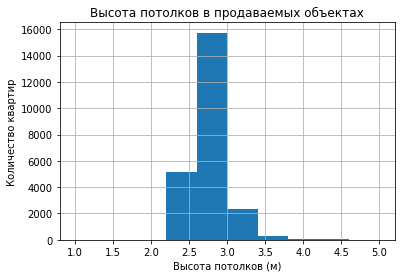

In [30]:
data['ceiling_height'].hist(range=(1,5))
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.title('Высота потолков в продаваемых объектах')
plt.grid(True);

**Пропущенные значения в столбце я заполнила медианным значением по расстоянию до центра города. Можно предположить, что дома, которые расположены в центре города - примерно одного типа, и потолки в них примерно однинаковой высоты.**

In [31]:
#пропущенные значения в столбце 'balcony' заменяем на 0 (если владелец их не указал, скорее всего их просто нет)
data['balcony'] = data['balcony'].fillna(0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  float64
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [32]:
data['is_apartment'].describe()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

In [33]:
data.loc[data['is_apartment']==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_from_city
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1.0,True,...,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN,далеко от центра
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3.0,True,...,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0,далеко от центра
1109,1,34878556.0,95.80,2014-12-09T00:00:00,2,3.20,6.0,58.300000,5.0,True,...,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0,центральный район
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,2.65,9.0,NaN,1.0,True,...,0.0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0,спальный район
2759,11,7500000.0,152.00,2018-07-27T00:00:00,3,3.00,3.0,NaN,1.0,True,...,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0,далеко от центра
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3.0,True,...,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0,далеко от центра
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7.0,True,...,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0,далеко от центра
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,2.60,13.0,19.800000,6.0,True,...,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0,далеко от центра
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9.0,True,...,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN,спальный район
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.000000,1.0,True,...,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0,далеко от центра


In [34]:
data['is_apartment']= data['is_apartment'].fillna(False)

In [35]:
data['locality_name'] =  data['locality_name'].fillna('unknown')

In [36]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [37]:
data['ponds_around3000']= data['ponds_around3000'].fillna(0)

Пропуски в остальных столбцах оставим без изменений. 

Мы видим пропущенные значения в достаточно большом количестве столбцов. У нас есть два типа данных - те, которые заполнялись пользователем, и те, которые были получены автоматически с помощью геосервисов. 
Пропуски можно объяснить тем, что пользователи по ошибке не указали часть данных (человеческий фактор) или же произошла техническая ошибка при выгрузке и записи данных. При получении данных с помощью геосервисов так же мог иметь место сбой оборудования иои ошибка программы. 

Там, где это было возможно (в столбцах 'ceiling_hight', 'floors_total') я заменила значения на медианные. В столбце 'ceiling_height' значения были заменены на медианные значения по удалённости от центра города. В столбцах 'balcony', 'parks_around3000' и 'pounds_around3000' пропущенные значения я заменила на 0, так как по данным можно сделать выводы, что пропуск означает отсутствие данного объекта в квартире (балкон) или около неё (парк,пруд). Пропуски в столбце 'is_apartment' были заменены на булево значение False, т.к. скорее всего места пропуска в данном столбце означает то, что объект не является аппартаментом. Пропуски в столбце 'locality_name'я заменила на'unknown', чтобы сберечь строки для дальнейшего исследования. Остальные пропуски были оставлены без изменений. 

In [38]:
#приведём значения в нужный формат:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment']= data['is_apartment'].astype('bool')

In [39]:
new_format = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']

for column in new_format:
    data[column] = data[column].astype('int')

In [40]:
#проверим произведённые изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  float64       
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [41]:
#поиск неявных дубликатов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Мы видим, что есть одинаковые названия населённых пунктов, различающиеся только написанием слов 'поселок' и 'посёлок', а также одинаковые названия городских посёлков и посёлков городского типа.

In [42]:
#заменим 'поселок' на 'посёлок'
data['locality_name'] = np.where(
    data['locality_name'].str.contains('поселок'), 
    data['locality_name'].str.replace('поселок', 'посёлок'), 
    data['locality_name']
)

In [43]:
#заменим ' городской посёлок' и 'посёлок городского типа' на 'посёлок'
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа', 'городской посёлок'], 'посёлок', regex=True)

In [44]:
#проверим произведённые изменения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [45]:
#отсортируем в алфавитном порядке
data_sorted=data['locality_name'].sort_values().unique()
print(data_sorted)

['unknown' 'Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг'
 'Высоцк' 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп'
 'Кириши' 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт'
 'Кудрово' 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино'
 'Никольское' 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво'
 'Подпорожье' 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург'
 'Светогорск' 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой'
 'Тихвин' 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревня Белогорка'
 'деревня Большая Вруда' 'деревня Большая Пустомержа'
 'деревня Большие Колпаны' 'деревня Большое Рейзино'
 'деревня Большой Сабск' 'деревня Бор' 'деревня Борисова Грива'
 'деревня Ваганово' 'деревня Вартемяги' 'деревня Вахнова Кара'
 'деревня Выскатка' 'деревня Гарболово' 'деревня Глинка'
 'деревня Горбунки' 'деревня Гостилицы' 'деревня Заклинье'
 'деревня Заневка' 'деревня Зимитицы' 'де

Мы убедились, что все неявные дубликаты были удалены.

#### check name

In [46]:
# check
data.locality_name.nunique()

323

Названия 'деревня Кудрово' и 'Кудрово' объединять не стоит, так как это два разных населённых пункта.

In [47]:
def locality_type(name):

    types = ['посёлок станции', 'деревня', 'посёлок', 'посёлок при железнодорожной станции',
             'садовое некоммерческое товарищество','садовое товарищество', 'село']
    
    if pd.isna(name):
        return 'некорректные данные'
        
    for t in types:
        if t in name:
            return t
    return 'город'

data['locality_type'] = data['locality_name'].apply(locality_type)

display(data[['locality_name','locality_type']])

,locality_name,locality_type
0,Санкт-Петербург,город
1,посёлок Шушары,посёлок
2,Санкт-Петербург,город
3,Санкт-Петербург,город
4,Санкт-Петербург,город
...,...,...
23694,Санкт-Петербург,город
23695,Тосно,город
23696,село Рождествено,село
23697,Санкт-Петербург,город


In [48]:
#дубликаты по сумме ключевых параметров
#duplicates = data[data.duplicated(
    #['floors_total', 'floor_number', 'rooms', 'total_area', 'living_area', 'kitchen_area', 
     #'city_centres_km', 'last_price', 'first_day_exposition'])]
#print(duplicates)

In [49]:
data['duplicated'] = data.duplicated(keep=False)
print(data.query('duplicated==True'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, distance_from_city, locality_type, duplicated]
Index: []

[0 rows x 25 columns]


In [50]:
#проверим, сколько осталось пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
distance_from_city          0
locality_type               0
duplicated                  0
dtype: int64

Предобработка данных была выполнена - данные были изучены на предмет ошибок, пропусков, дубликатов. Были исправлены небольшие неточности в стиле названия столбцов. Там, где это возможно, пропуски были заменены на подходящие значения, благодаря чему заметно сократилось количество столбцов, содержищих пропущенные значения. Данные были приведены к подходящему формату. И так же были обработаны неявные дубликаты в стобце с названиями населённых пунктов. Названия 'деревня Кудрово' и 'Кудрово' не являются дубликатами, так как это два разных населённых пункта. Деревня Кудрово - это историческое поселение, а Кудрово - город в составе Ленинградской области.

### Добавьте в таблицу новые столбцы

In [51]:
#цена одного квадратного метра
data['price_per_square_meter'] = data['last_price']/data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].round(2)

In [52]:
#день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
data['weekday'] = data['first_day_exposition'].dt.weekday

In [53]:
#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [54]:
#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [55]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_def(row):
    try:
        if row['floors_total'] <= 0:
            return 'некорректные данные' 
        
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        elif row['floor'] > 1:
            return 'другой'
        else:
            return 'некорректный этаж'
    except:
        pass

In [56]:
data['floor_number'] = data.apply(floor_def, axis=1) 

In [57]:
display(data.query('floors_total<=0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,distance_from_city,locality_type,duplicated,price_per_square_meter,weekday,month,year,floor_number


In [58]:
#расстояние до центра города в километрах
data['city_centres_km'] = (data['city_centers_nearest']/1000).round(0)

In [59]:
print(data)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23696            18   2500000.0       56.70           2018-02-11      2   
23697            13  11475000.0       76.75           2017-03-28      2   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

Новые столбцы были успешно добавлены.

### Проведите исследовательский анализ данных

#### Изучим параметры

##### Изучим параметр ***'Общая площадь'***

In [60]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

По полученным данным видно, что в среднем квартиры на продажу имеют площадь в 60 кв.метров. Самая маленькая из представленных квартир имеет площадь всего 12 кв.метров, а самая большая - 900 кв.метров.

In [61]:
data['total_area'].sort_values(ascending=False).head(10)

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64

Квартира с площадью 900 кв.метров такая одна, и скорее является исключение. Построим гистограмму, чтобы посмотреть распределение квартир по площадям.

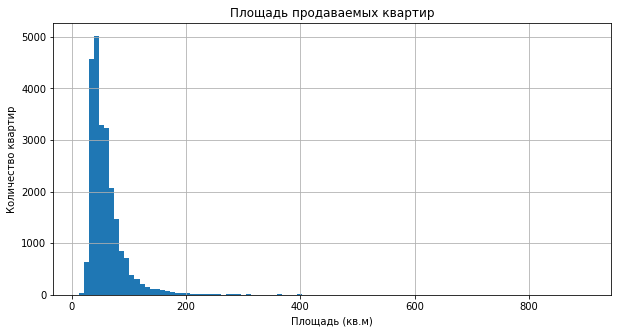

In [62]:
plt.figure(figsize=(10, 5))
plt.hist(data['total_area'], bins = 100)
plt.grid(True)
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Площадь продаваемых квартир');

Мы видим, что основное число квартир расположено в диапазоне от 20 до 100 кв. метров (на это нам  также указам метод describe() - 3-й квартиль равняется 69 кв.метрам). Построим гистограмму с новыми границами.

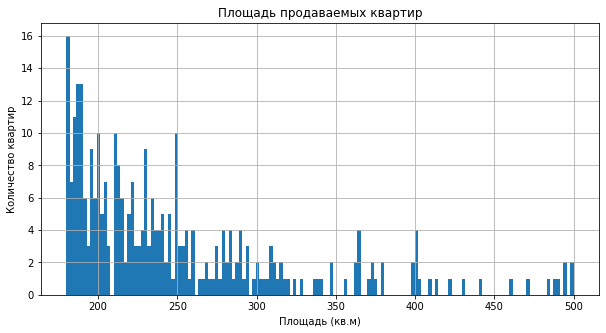

In [63]:
plt.figure(figsize=(10, 5))
plt.hist(data['total_area'], bins = 150, range=(180,500))
plt.grid(True)
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Площадь продаваемых квартир');

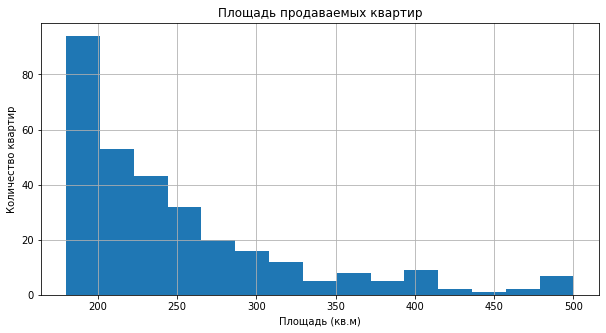

In [64]:
plt.figure(figsize=(10, 5))
plt.hist(data['total_area'], bins = 15, range=(180,500))
plt.grid(True)
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Площадь продаваемых квартир');

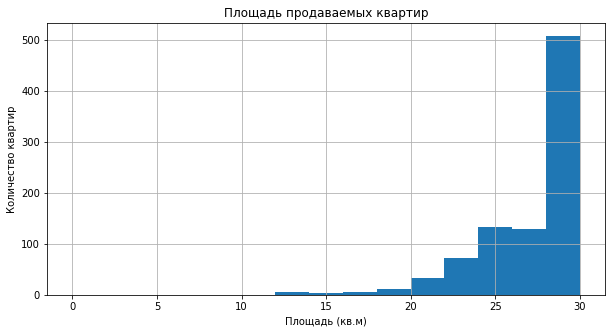

In [65]:
plt.figure(figsize=(10, 5))
plt.hist(data['total_area'], bins = 15, range=(0,30))
plt.grid(True)
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Площадь продаваемых квартир');

In [66]:
total_area_sorted = data.query('total_area >250 or total_area < 20')
print(len(total_area_sorted))

139


In [67]:
total_area_sorted_part = len(total_area_sorted)/len(data['total_area'])
print(total_area_sorted_part)

0.0058652263808599515


Число квартир с площадью менее 20 и более 250 кв.метров составляет менее 1% от общего числа квартир. Это значение не такое большое, поэтому эти данные мы можем пока из анализа исключить, и рассмотреть данные с площадями квартир до 250 кв. метров.

In [68]:
good_data= data[(data['total_area'] >= 20) & (data['total_area'] <= 250)]
display(good_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,distance_from_city,locality_type,duplicated,price_per_square_meter,weekday,month,year,floor_number,city_centres_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8.0,False,...,NaN,далеко от центра,город,False,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.60,11,18.6,1.0,False,...,81.0,далеко от центра,посёлок,False,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4.0,False,...,558.0,спальный район,город,False,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9.0,False,...,424.0,спальный район,город,False,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13.0,False,...,121.0,спальный район,город,False,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3.0,False,...,NaN,далеко от центра,город,False,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.60,5,38.0,4.0,False,...,45.0,далеко от центра,город,False,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.60,3,29.7,1.0,False,...,NaN,далеко от центра,село,False,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12.0,False,...,602.0,спальный район,город,False,149511.40,1,3,2017,другой,10.0


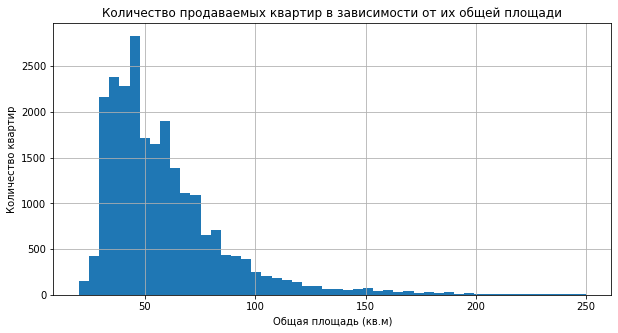

In [69]:
#Построим гистограмму с новыми границами.
plt.figure(figsize=(10, 5))
plt.hist(good_data['total_area'], bins = 50)
plt.grid(True)
plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их общей площади');

***Вывод:***

На гистограмме видно, что большинство квартир имеют площадь от 30 до 70 кв.метров, с пиковым значением около 45 кв.метров. 

##### Изучим параметр ***'Жилая площадь'***

In [70]:
good_data['living_area'].describe()

count    21684.000000
mean        33.783155
std         18.927476
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        220.000000
Name: living_area, dtype: float64

Среднее значение жилой площади составляет 34 кв.метра, самая большая жилая площадь - 409 кв.метров, а самая маленькая - 2 кв.метра. При этом 75% квартир имеют жилую площадь до 75 кв.метров.

In [71]:
#посмотрим на данные по квартирам с самой маленькой жилой площадью
good_data['living_area'].sort_values().head(10)

21758    2.0
13915    2.0
23574    3.0
3242     3.0
17582    5.0
21943    5.4
16431    6.0
19251    6.5
20994    8.0
23208    8.0
Name: living_area, dtype: float64

In [72]:
#посмотрим на данные по квартирам с самой большой жилой площадью
good_data['living_area'].sort_values(ascending=False).head(10)

7857     220.0
22907    200.0
3043     184.0
681      180.0
18945    176.6
8634     175.0
7658     174.3
6166     171.0
7521     170.8
20829    168.3
Name: living_area, dtype: float64

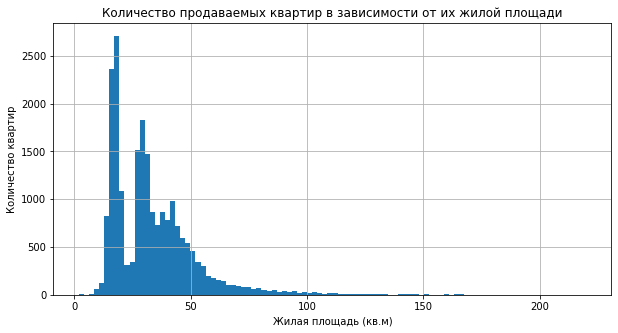

In [73]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['living_area'], bins = 100)
plt.grid(True)
plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их жилой площади');

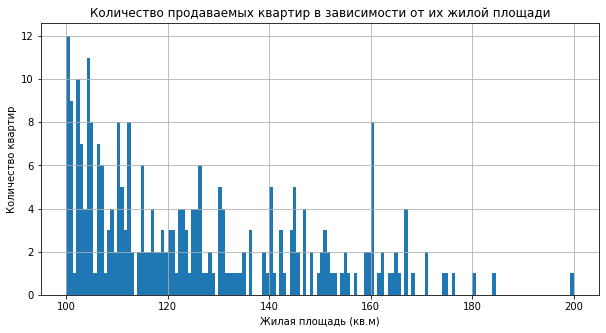

In [74]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['living_area'], bins = 150, range=(100,200))
plt.grid(True)
plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их жилой площади');

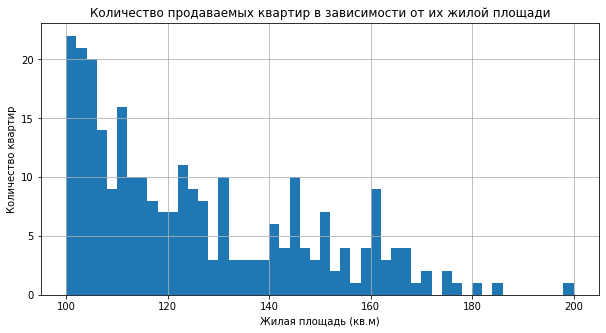

In [75]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['living_area'], bins = 50, range=(100,200))
plt.grid(True)
plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их жилой площади');

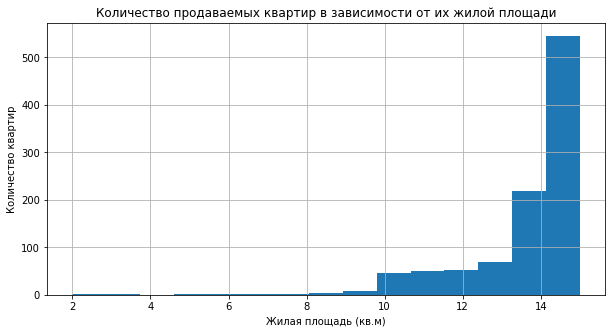

In [76]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['living_area'], bins = 15, range=(2,15))
plt.grid(True)
plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их жилой площади');

In [77]:
print((len(good_data.query('living_area >180 or living_area<10'))))

27


In [78]:
print((len(good_data.query('living_area >180 or living_area<10')))/(len(good_data['living_area'])))

0.0011460101867572156


Число квартир с жилой площадью менее 10 кв.метров и более 180 кв.метров составляют менее 1% от общего числа квартир. Это значение не такое большое, поэтому эти данные мы можем пока из анализа исключить, и рассмотреть данные с площадями квартир от 8 до 100 кв. метров.

#### check nan

In [79]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int64         
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  float64       
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

In [80]:
living_area_sorted = ((good_data['living_area'] <= 180) & (good_data['living_area'] >= 10)) | (good_data['living_area'].isna())

In [81]:
good_data = good_data.drop(good_data[~living_area_sorted].index)

In [82]:
# check
good_data.shape[0]

23533

In [83]:
#print(good_data.sort_values(by='living_area', ascending = False))

In [84]:
#квартиры, которые имеют площадь от 8 до 180 кв.метров
#living_area_sorted = good_data.query('living_area <180 and living_area>13')
#print(living_area_sorted)

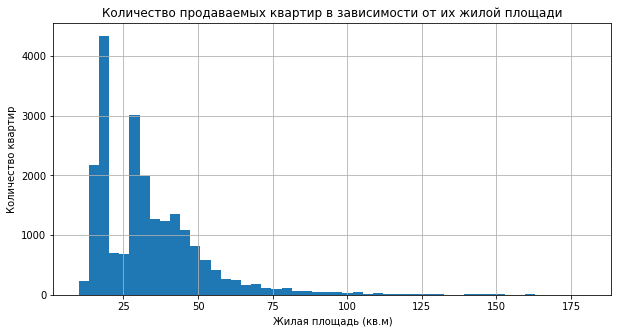

In [85]:
#Построим на гистограмму
plt.figure(figsize=(10, 5))
plt.hist(good_data['living_area'], bins = 50)
plt.grid(True)
plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их жилой площади');

 ***Вывод:***

На гистограмме видно, что большинство продаваемых квартир имеют жилую площадь от 15 до 65 кв. метров. Самый большой пик наблюдается в районе площади 18 кв.метров. Далее с ростом жилой площади наблюдается значительное уменьшение количества квартир, но когда значение доходит до 27 кв.метров - снова наблюдается увеличение количества квартир. Ещё одно небольшое увеличение количества квартир наблюдается в районе площади 30 кв.метров, и небольшой пик в районе 45 кв.метров. И далее с увеличением площади количество квартир постепенно уменьшается.

##### Изучим параметр ***'Площадь кухни'***

In [86]:
good_data['kitchen_area'].describe()

count    21299.000000
mean        10.457870
std          5.555518
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Среднее значение площади кухни составляет 10,5 кв.метров, самая большая кухонная площадь - 107 кв.метров, а самая маленькая - 1,3 кв.метра. При этом 75% квартир имеют площадь кухни до 12 кв.метров.

In [87]:
#посмотрим на данные по квартирам с самой маленькой площадью кухни
good_data['kitchen_area'].sort_values().head(10)

20217    1.30
9138     2.00
6262     2.00
11033    2.00
16367    2.00
906      2.00
21419    2.00
17834    2.30
7950     2.89
18066    3.00
Name: kitchen_area, dtype: float64

In [88]:
#посмотрим на данные по квартирам с самой большой площадью кухни
good_data['kitchen_area'].sort_values(ascending=False).head(10)

20215    107.0
16239     93.2
16797     93.0
10867     87.2
4394      77.0
492       77.0
14644     75.0
16647     72.0
6193      70.0
22980     65.0
Name: kitchen_area, dtype: float64

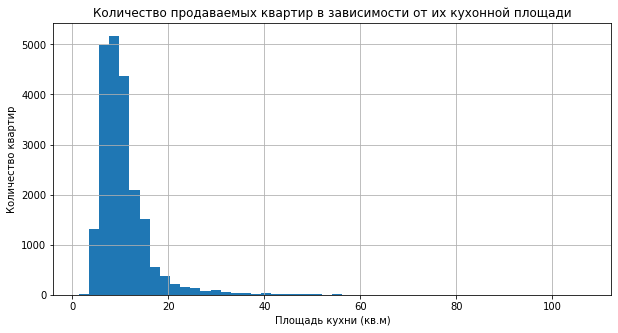

In [89]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['kitchen_area'], bins = 50)
plt.grid(True)
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их кухонной площади');

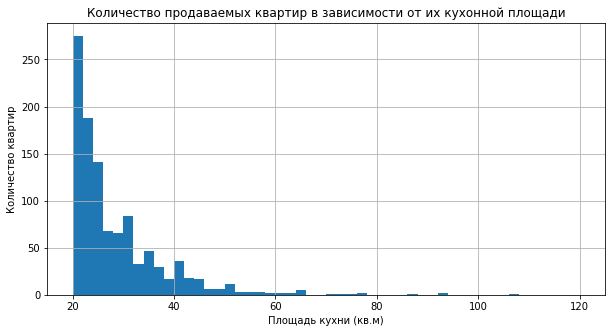

In [90]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['kitchen_area'], bins = 50, range=(20,120))
plt.grid(True)
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их кухонной площади');

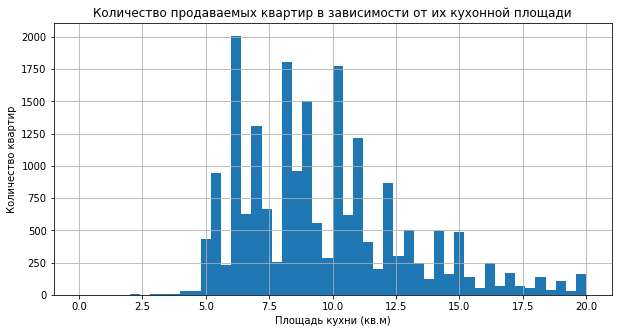

In [91]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['kitchen_area'], bins = 50, range=(0,20))
plt.grid(True)
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их кухонной площади');

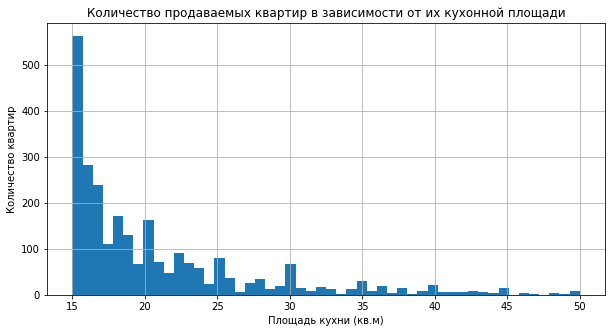

In [92]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['kitchen_area'], bins = 50, range=(15,50))
plt.grid(True)
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их кухонной площади');

In [93]:
print(len(good_data.query('kitchen_area >40 or kitchen_area<5')))

206


In [94]:
print((len(good_data.query('kitchen_area >40 or kitchen_area<5')))/(len(good_data['kitchen_area'])))

0.008753665066077424


Число квартир с площадью кухни менее 5 кв.метров и более 40 кв.метров составляют менее 1 % от общего числа квартир. Это значение не такое большое, поэтому эти данные мы можем пока из анализа исключить, и рассмотреть данные с площадью кухни от 5 до 40 кв. метров.

In [95]:
#квартиры, в которых (good_data['kitchen_area'] < 40) & (good_data['kitchen_area'] >= 5)площадь кухни составляет от 5 до 40 кв.метров
#kitchen_area_sorted = data.query('kitchen_area <40 and kitchen_area>5')

In [96]:
kitchen_area_sorted = ((good_data['kitchen_area'] <= 40) & (good_data['kitchen_area'] >= 5)) | (good_data['kitchen_area'].isna())

In [97]:
#квартиры, в которых площадь кухни составляет от 5 до 40 кв.метров
good_data = good_data.drop(good_data[~kitchen_area_sorted].index)

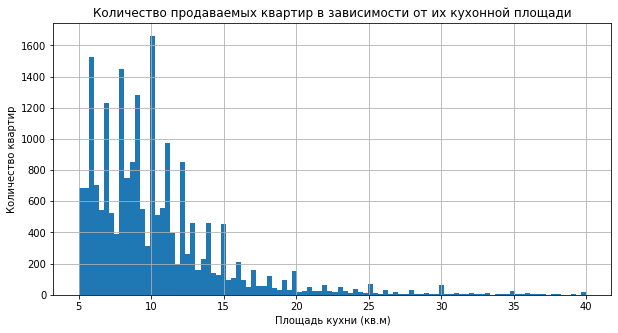

In [98]:
#Построим на гистограмму
plt.figure(figsize=(10, 5))
plt.hist(good_data['kitchen_area'], bins = 100)
plt.grid(True)
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их кухонной площади');

***Вывод:***

На гистограмме видно, что большинство продаваемых квартир имеют площадь кухни от 6 до 18 кв. метров. Наблюдаются пиковые значения в районе площади 6,8,9 кв.метров. Самый большой пик наблюдается в районе площади 10 кв.метров. Далее с ростом площади кухни наблюдается значительное уменьшение предложений квартир, хотя и здесь снижение неоднородное, и можно наблюдать небольшие пики - например,при площади в 11, 15 кв.метров наблюдается увеличение количества квартир, а при 14 кв.метрах - снижение. И далее с увеличение площади кухни количество квартир уменьшается, но так же неоднородно.

In [99]:
good_data.shape[0]

23327

##### Изучим параметр ***'Цена объекта'***

In [100]:
good_data['last_price'].describe()

count    2.332700e+04
mean     6.092459e+06
std      6.623145e+06
min      4.300000e+05
25%      3.420000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Средняя цена квартиры составляет 6 092 459 рублей, самый дорогой объект стоит 330 000 000 рублей, а самый бюджетный - 430 000 рублей. При этом 75% квартир стоят до 6 700 000 рублей.

In [101]:
#отсортируем данные по возрастанию
good_data['last_price'].sort_values().head()

17456    430000.0
14911    430000.0
16274    440000.0
5698     450000.0
17676    450000.0
Name: last_price, dtype: float64

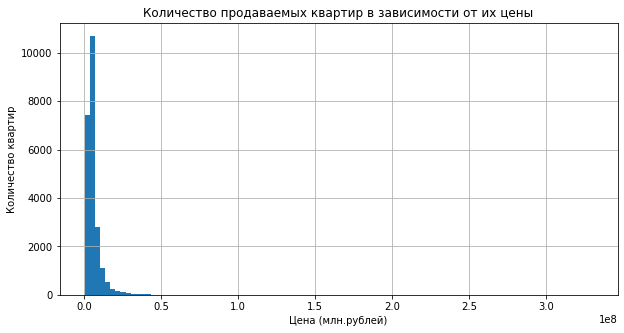

In [102]:
#Построим на гистограмму
plt.figure(figsize=(10, 5))
plt.hist(good_data['last_price'], bins = 100)
plt.grid(True)
plt.xlabel('Цена (млн.рублей)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их цены');

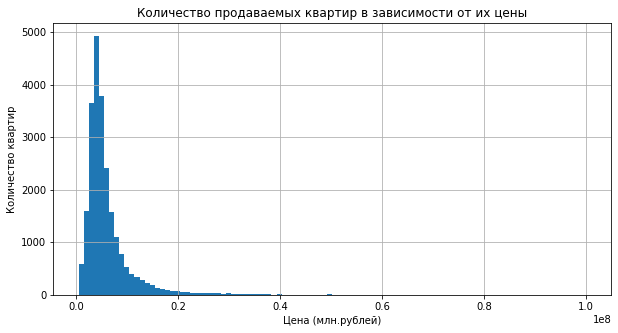

In [103]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['last_price'], bins = 100, range=(430000, 100.000000e+06))
plt.grid(True)
plt.xlabel('Цена (млн.рублей)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их цены');

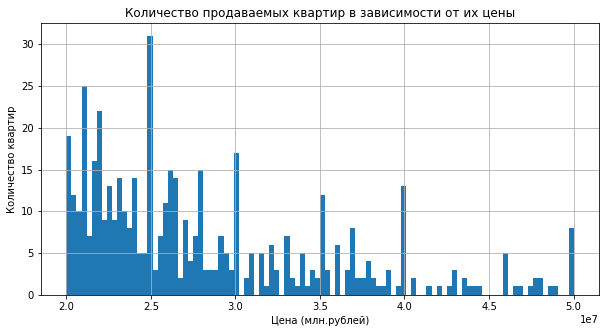

In [104]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['last_price'], bins = 100, range=(20.000000e+06, 50.000000e+06))
plt.grid(True)
plt.xlabel('Цена (млн.рублей)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их цены');

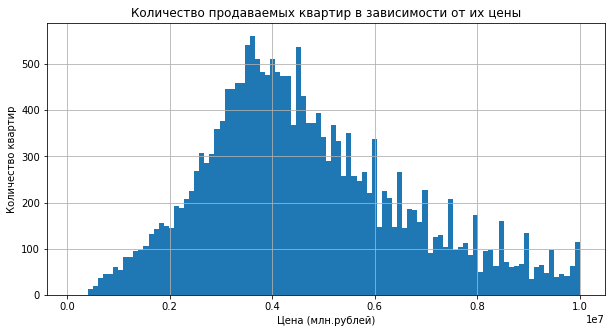

In [105]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['last_price'], bins = 100, range=(1.000000e+05, 10.000000e+06))
plt.grid(True)
plt.xlabel('Цена (млн.рублей)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их цены');

In [106]:
print(len(good_data.query('last_price >25.000000e+06 or last_price<1.000000e+06')))
print((len(good_data.query('last_price >25.000000e+06 or last_price<1.000000e+06')))/(len(good_data['last_price'])))

547
0.023449221931667166


Число квартир с ценой менее 1 млн рублей и более 25 млн рублей составляют около 2% от общего числа квартир. Это значение не такое большое, поэтому эти данные мы можем пока из анализа исключить, и рассмотреть данные с ценой квартир от 1 до 25 млн рублей.

In [107]:
#квартиры, которые имеют цену от 1 до 25 миллионов
#last_price_sorted = data.query('last_price < 25.000000e+06 and last_price>1.000000e+06')

In [108]:
#last_price_sorted = ((good_data['last_price'] < 25.000000e+06) & (good_data['last_price']>1.000000e+06))|(good_data['last_price'].isna())

In [109]:
good_data= good_data[(good_data['last_price'] < 25.000000e+06) & (good_data['last_price']>1.000000e+06)]

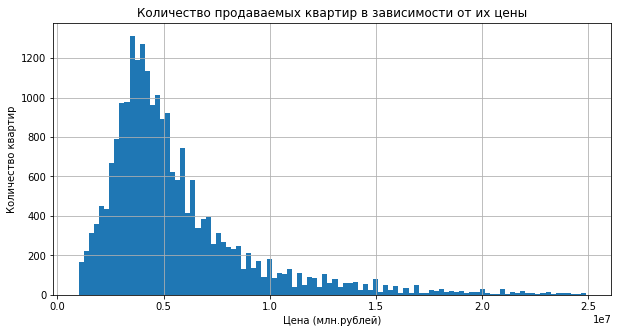

In [110]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['last_price'], bins = 100)
plt.grid(True)
plt.xlabel('Цена (млн.рублей)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от их цены');

***Вывод:***

На гистограмме видно, что стоимость большинства продаваемых объектов составляет от 3 200 000 до 7 500 000 рублей. Данные весьма неоднородны, наблюдается большое количество пиковых значений по всему графику. Самое большое пиковое значение наблюдается в районе цены 3 500 000 рублей. Далее с ростом цены наблюдается значительное уменьшение предложений квартир, которое впоследствии сменяется новыми пиковыми значениями. Снижение происходит и дальше, но неоднородно.

In [111]:
good_data.shape[0]

22737

##### Изучим параметр ***'Количество комнат'***

In [112]:
good_data['rooms'].describe()

count    22737.000000
mean         2.028148
std          1.000000
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

В среднем продаваемый объект имеет 2 комнаты, объект с самым большим количеством комнат имеет 11 комнат, а самым маленьким - 1 комнату. При этом 75% квартир имеют до 3 комнат.

In [113]:
good_data['rooms'].value_counts()

1     7850
2     7732
3     5580
4     1048
5      236
0      186
6       66
7       28
8        6
9        3
10       1
11       1
Name: rooms, dtype: int64

In [114]:
good_data['rooms'].sort_values(ascending=False).head()

648      11
18119    10
13019     9
20791     9
8860      9
Name: rooms, dtype: int64

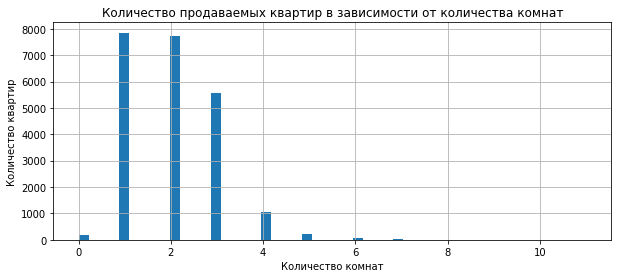

In [115]:
#Построим на гистограмму
plt.figure(figsize=(10, 4))
plt.hist(good_data['rooms'], bins = 50)
plt.grid(True)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от количества комнат');

In [116]:
#посмотрим, сколько объектов имеют больше 8 комнат, также исключим нулевые значения
print(len(good_data.query('rooms >8 or rooms==0')))
print((len(good_data.query('rooms >8 or rooms ==0')))/(len(good_data['rooms'])))

191
0.008400404626819721


Это количество очень мало (менее 1%), и мы может временно исключить объекты, которые имеют больше 8 комнат, из нашего анализа.

In [117]:
#rooms_sorted=data.query('rooms<8 and rooms>0')

In [118]:
#rooms_sorted = ((good_data['rooms'] < 8) & (good_data['rooms'] > 0))

In [119]:
good_data = good_data[(good_data['rooms'] <= 8) & (good_data['rooms'] > 0)]

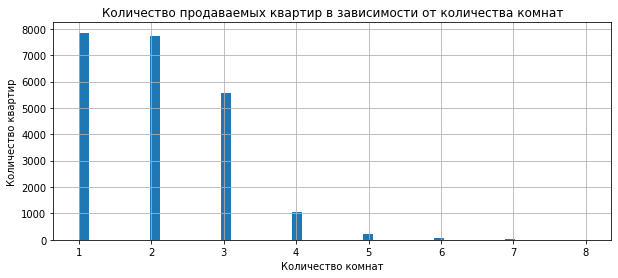

In [120]:
plt.figure(figsize=(10, 4))
plt.hist(good_data['rooms'], bins = 50)
plt.grid(True)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от количества комнат');

***Вывод:***

На гистограмме видно, что с увеличением количества комнат снижается количество предложенных объектов. Больше всего объектов с 1 и 2 комнатами. Далее следуют квартиры с 3 комнатами. Предложений с количесвом комнат больше 5 уже практически нет.

In [121]:
good_data.shape[0]

22546

##### Изучим параметр ***'Высота потолков'***

In [122]:
good_data['ceiling_height'].describe()

count    22546.000000
mean         2.681932
std          0.229770
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Средняя высота потолков в объектах составляет 2,7 метра. Самый низкий потолок - 1 метр, самый высокий - 10 метров. Потолок не может иметь высоту 1 метр, высоту потолка до 2,5 метров можно считать аномалиями.

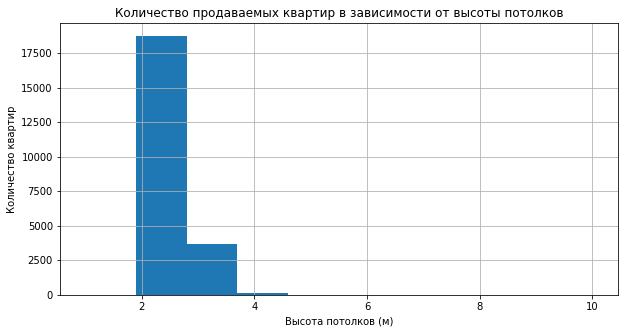

In [123]:
#Построим на гистограмму
plt.figure(figsize=(10, 5))
plt.hist(good_data['ceiling_height'])
plt.grid(True)
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от высоты потолков');

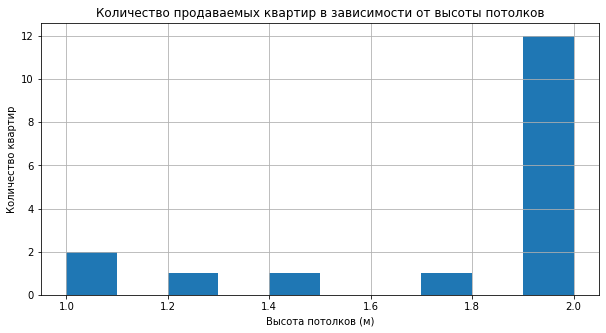

In [124]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['ceiling_height'], range = (1,2))
plt.grid(True)
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от высоты потолков');

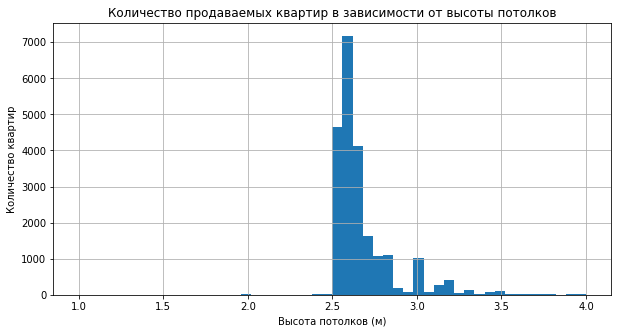

In [125]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['ceiling_height'],bins=50, range = (1,4))
plt.grid(True)
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от высоты потолков');

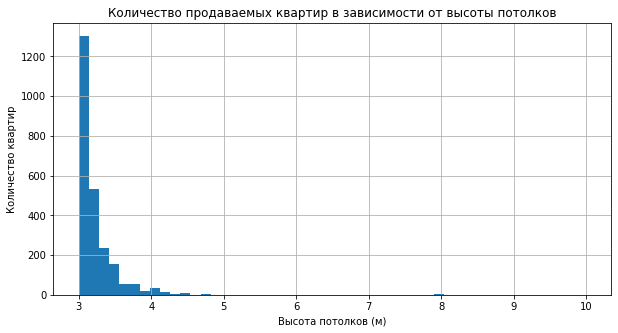

In [126]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['ceiling_height'],bins=50, range = (3,10))
plt.grid(True)
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от высоты потолков');

In [127]:
#посмотрим, сколько объектов имеют потолок ниже 2,5 метров и выше 5
print(len(good_data.query('ceiling_height <2.5 or ceiling_height >5')))
print((len(good_data.query('ceiling_height <2.5 or ceiling_height >5')))/(len(good_data['ceiling_height'])))

82
0.0036370087820455956


Это количество очень мало (менее 1%), и мы может временно исключить объекты, высота потолка которых меньше 2,5 метров и больше 5 метров, из нашего анализа.

In [128]:
#ceiling_height_sorted = data.query('ceiling_height > 2.5 and ceiling_height < 5')

In [129]:
#ceiling_height_sorted = ((good_data['ceiling_height'] >= 2.5) & (good_data['ceiling_height'] <= 5))

In [130]:
#good_data = good_data.drop(good_data[~ceiling_height_sorted].index)

In [131]:
good_data = good_data[(good_data['ceiling_height'] >= 2.5) & (good_data['ceiling_height'] <= 5)]

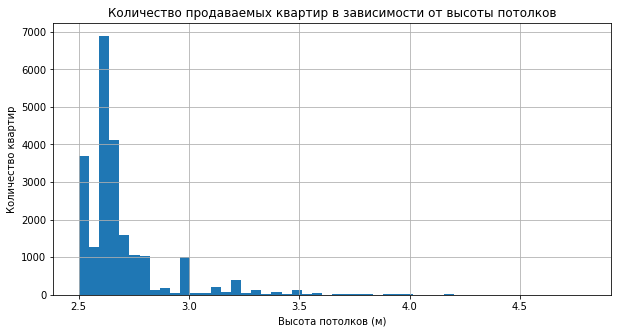

In [132]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['ceiling_height'], bins = 50)
plt.grid(True)
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от высоты потолков');

***Вывод:***

На гистограмме видно, что больше всего продаваемых объектов имеют высоту потолков 2,6 метров. Далее идут объекты с высотой потолков 2,7 метра, чуть меньше предложений с высотой потолков 2,8 метра. С увеличением высоты потолков количество объектов уменьшается. Исключением являются объекты с высотой потолков 3 метра - объявлений об их продаже достаточно много (около 1000). Это можно объяснить тем, что такая высота потолков часто встречается как в старых домах в центральных районах, так и в новостройках.

In [133]:
good_data.shape[0]

22464

##### Изучим параметр ***'Тип этажа квартиры'***

In [134]:
good_data['floor_number'].value_counts()

другой       16602
последний     3120
первый        2742
Name: floor_number, dtype: int64

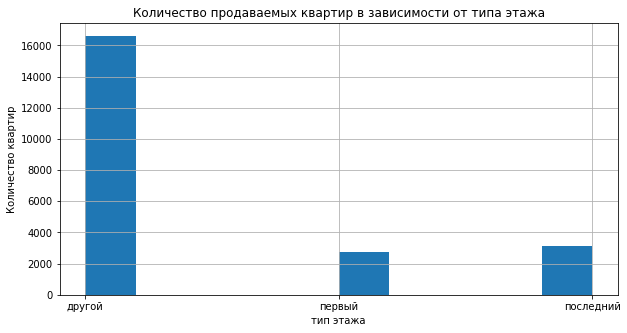

In [135]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['floor_number'])
plt.grid(True)
plt.xlabel('тип этажа')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от типа этажа');

***Вывод:***

Самые часто встречающиеся объкты в объявлениях о продаже расположены на этаже, который не является ни первым, ни последним. На втором месте - объекты на последнем этаже. А меньше всего объектов расположено на первом этаже.

##### Изучим параметр ***'Общее количество этажей в доме'***

In [136]:
good_data['floors_total'].describe()

count    22464.000000
mean        10.767094
std          6.584026
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [137]:
good_data['floors_total'].sort_values(ascending=False).head()

2253     60
16731    52
11079    36
5807     36
397      36
Name: floors_total, dtype: int64

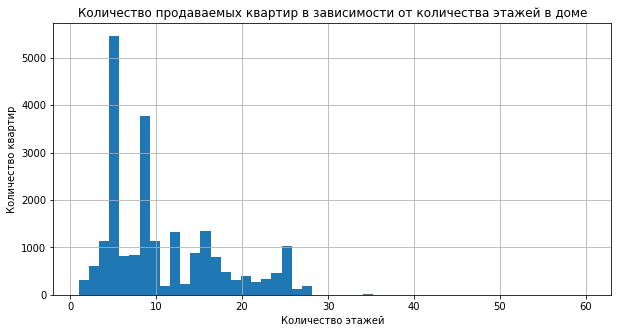

In [138]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['floors_total'], bins=50)
plt.grid(True)
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от количества этажей в доме');

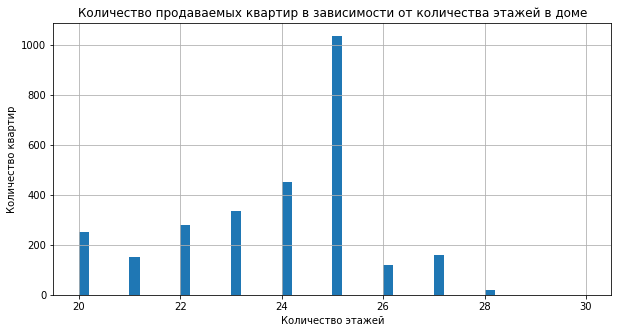

In [139]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['floors_total'], bins=50, range=(20,30))
plt.grid(True)
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от количества этажей в доме');

In [140]:
print(len(good_data.query('floors_total>27')))
print((len(good_data.query('floors_total>27')))/(len(good_data['floors_total'])))

51
0.0022702991452991455


Дома, в которых больше 25 этажей составляют менее 1 % от общего числа домов, и эти данные можно временно исключить из анализа.

In [141]:
#floors_total_sorted = data.query('floors_total<27')

In [142]:
good_data = good_data[good_data['floors_total'] <=27]

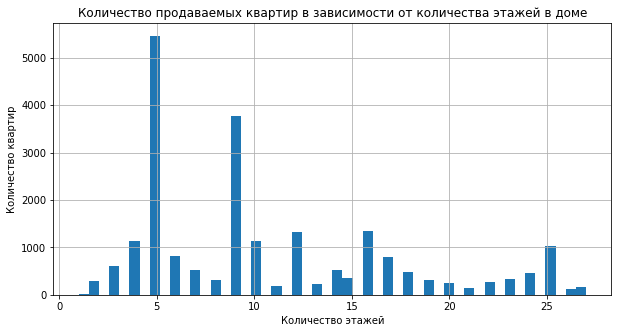

In [143]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['floors_total'], bins=50)
plt.grid(True)
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от количества этажей в доме');

***Вывод:***

Больше всего продаваемых объектов расположено в 5-ти этажных домах. Вторыми по количеству предложений являются объекты в 9-ти этажных домах. Далее увеличение количества предложений наблюдается в домах с 12, 16 и 25 этажами.

In [144]:
good_data.shape[0]

22413

##### Изучим параметр ***'Расстояние до центра города в метрах'***

In [145]:
good_data['city_centers_nearest'].describe()

count    17301.000000
mean     14412.335761
std       8579.398433
min        208.000000
25%       9701.000000
50%      13230.000000
75%      16407.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Среднее расстояние до центра города составляет 14 километров. Самый далекий от центра объект находится на расстоянии почти 66 километров от центра, а самый близкий к центру - на расстоянии 208 метров (прямо в центре города). При этом 75% объектов расположены на расстоянии до 16 километров от центра Санкт-Петербурга.

In [146]:
print(len(good_data.query('city_centers_nearest > 35000')))
print((len(good_data.query('city_centers_nearest > 35000')))/(len(good_data['city_centers_nearest'])))

412
0.018382188908222907


Объекты, расположенные дальше 35 километров от центра города составляют 1,6% от общего числа объектов, и эти данные можно временно исключить из анализа.

In [147]:
#city_centers_nearest_sorted = data.query('city_centers_nearest < 35000')

In [148]:
city_centers_nearest_sorted = (good_data['city_centers_nearest'] <= 35000) | (good_data['city_centers_nearest'].isna())

In [149]:
#good_data = good_data[good_data['city_centers_nearest'] <= 35000]

In [150]:
good_data = good_data[city_centers_nearest_sorted]

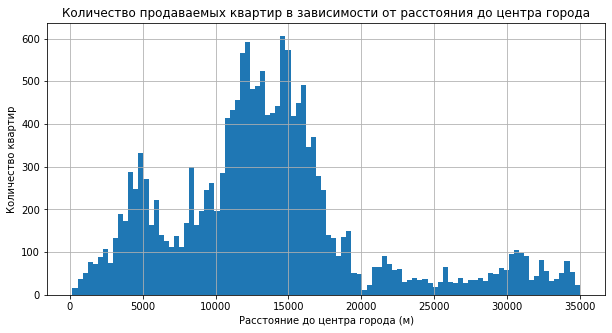

In [151]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['city_centers_nearest'], bins=100, range=(180,35000))
plt.grid(True)
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от расстояния до центра города');

***Вывод:***

Больше всего продаваемых объектов находится на расстоянии 12000 - 16000 метров от центра города. Вторая по величине группа объектов находится на расстоянии 5000 метров от центра города.

In [152]:
good_data.shape[0]

22001

##### Изучим параметр ***'Расстояние до ближайщего парка в метрах'***

In [153]:
good_data['parks_nearest'].describe()

count    7429.000000
mean      495.606946
std       342.987608
min         1.000000
25%       293.000000
50%       456.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В среднем предлагаемые объекты размещения находится в 490 метрах от парков. Самый близкий к парку объект находится от него на расстоянии 1 метра, а самый далёкий - на расстоянии больше 3 километров. При этом 75% объектов находятся на расстоянии до 600 метров от парка. 

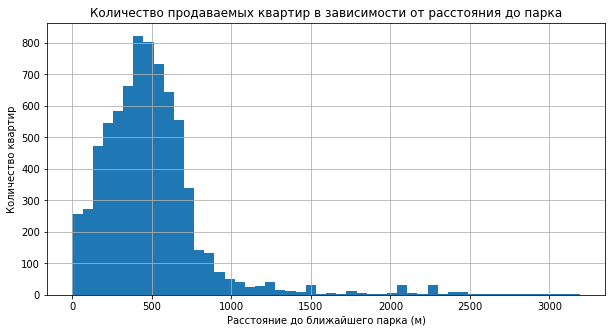

In [154]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['parks_nearest'], bins=50, range=(1,3190))
plt.grid(True)
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от расстояния до парка');

In [155]:
print(len(good_data.query('parks_nearest > 1500')))
print((len(good_data.query('parks_nearest > 1500')))/(len(good_data['parks_nearest'])))

159
0.007226944229807736


Объекты, расположенные дальше 1,5 километров от парка составляют около 1 % от общего числа объектов, и эти данные можно временно исключить из анализа.

In [156]:
#parks_nearest_sorted = data.query('parks_nearest < 1500')

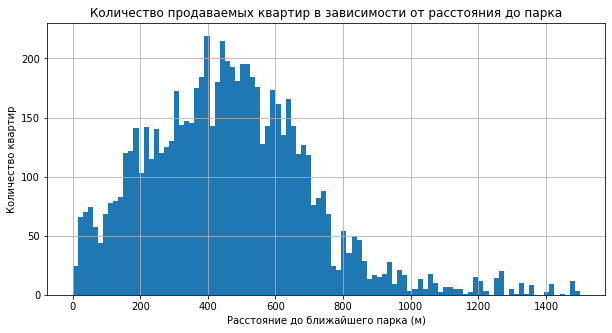

In [157]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['parks_nearest'], bins=100, range =(0,1500))
plt.grid(True)
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Количество квартир')
plt.title('Количество продаваемых квартир в зависимости от расстояния до парка');

 ***Вывод:***

На гистограмме можно наблюдать много пиковых значений, что показвает, что при заданых параметрах (расстояние до ближайшего парка меньше 1,5 километров) расстояние до ближайшего парка не влияет на количество предложений и не является решающим фактром при выборе квартиры. Чаще всего ближайший парк находится от продаваемого объекта в 400 и 500 метрах. Немного меньшее пиковое значение составляет 550 метров. 

In [158]:
good_data.shape[0]

22001

# Вывод:

Были узучены аномалии в столбцах 'total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms','ceiling_height', 'floors_total', 'city_centres_nearest'.
1. Из столбца 'total_area' были исключены объекты с общей площадью меньше 20 и больше 250 кв. метров.
2. Из столбца 'living_area' были исключены объекты с жилой площадью меньше 13 и больше 180 кв. метров.
3. Из столбца 'kitchen_area' были исключены объекты с площадью кухни меньше 5 и больше 40 кв. метров.
4. Из столбца 'last_price' были исключены объекты с ценой меньше 1 и больше 25 миллионов рублей.
5. Из столбца 'rooms' были исключены объекты, в которых больше 8 комнат, и в которых меньше 1 комнаты.
6. Из столбца 'ceiling_height' были исключены объекты с высотой потолков менее 2,5 и более 5 метров.
7. Из столбца 'floors_total' были исключены объекты, которые находятся в домах, имеющих более 27 этажей.
8. Из столбца 'city_centres_nearest' были исключены объекты, которые находятся дальше 35 километров от центра.

В результате в отфильтрованном датасете осталось 22 001 значение. В результате удаления из столбцов аномалий, было удалено 7% исходных данных.

# Вывод по изученным параметрам:

1. Наиболее часто продаваемые объекты имеют площадь от 30 до 70 кв.метров, больше всего предложений на рынке объектов с площадью около 45 кв.метров.
2. Большинство предлагаемых квартир имеют жилую площадь от 15 до 65 кв. метров. Больше всего объявлений с жилой площадью в 18 кв.метров, на втором месте предложения с жилой площадью 30 кв.метров. С увеличением жилой площади количество объявлений постепенно уменьшается.
3. Большинство продаваемых квартир имеют площадь кухни от 6 до 16 кв. метров, при этом самое больше число объектов имеют площадь кухни около 10 кв.метров. Далее можно наблюдать рост предложений с площадью кухни в 11, 15 кв.метров. Наблюдается тенденция, что с увеличение площади кухни количество квартир уменьшается.
4. Стоимость большинства продаваемых объектов составляет от 3 200 000 до 7 500 000 рублей. Больше всего предложений можно найти в районе цены 3 500 000 рублей.
5. Больше всего предложено объектов с 1 и 2 комнатами, немного меньше предложений с 3 комнатами.
6. Пропуски в столбце с высотой потолков были заполнены медианными значениями по удалённости от центра города. Это поможет избежать появления ееточности в данных и сохранить различия между старыми домами и новостройками. 
Благодаря такому заполнению пропусков мы получили, что большинство продаваемых объектов имеют высоту потолков 2,6 метров. Далее идут объекты с высотой потолков 2,7 и 2,8 метра. С увеличением высоты потолков количество объектов уменьшается. Исключение составляют объекты с высотой 3 метра.
7. Самые часто встречающиеся объкты в объявлениях о продаже расположены на этаже, который не является ни первым, ни последним. На втором месте - объекты на последнем этаже. А меньше всего объектов расположено на первом этаже.
8. Больше всего объектов предлагается в 5-ти этажных домах. Далее следуют предложения в 9-ти этажных домах.
9. Большинство продаваемых объектов находится на расстоянии 12 000 - 16 000 метров от центра города. Вторая по величине группа предлагаемых объектов находится на расстоянии 5000 метров от центра города.
10. О влиянии расстояние до ближайшего парка на количество предложений сложно сделать однозначный вывод по причине большого количества пропусков в данном столбце. При анализе имеющихся данных, мы получили, что чаще всего ближайший парк находится от продаваемого объекта в 400 и 500 метрах. Несмотря на отсутсвие многих данных, можно сказать, что полученный результ похож на реальную ситуацию - в Санкт-петербурге и области достаточное большое количество парков, и большинство объектов действительно могут находиться рядом с ними. Но для более качественного анализа этого параметра необходимо получить реальные данные, которые были вместо пропусков.

In [159]:
#1 и 2- комнатные квартиры
data.query('rooms==1 or rooms==2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,distance_from_city,locality_type,duplicated,price_per_square_meter,weekday,month,year,floor_number,city_centres_km
1,7,3350000.0,40.40,2018-12-04,1,2.60,11,18.6,1.0,False,...,81.0,далеко от центра,посёлок,False,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4.0,False,...,558.0,спальный район,город,False,92785.71,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13.0,False,...,121.0,спальный район,город,False,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.60,12,14.4,5.0,False,...,55.0,далеко от центра,посёлок,False,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.60,26,10.6,6.0,False,...,155.0,далеко от центра,посёлок,False,99195.71,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7.0,False,...,519.0,далеко от центра,город,False,129903.98,3,10,2016,другой,4.0
23692,2,1350000.0,30.00,2017-07-07,1,2.60,5,17.5,4.0,False,...,413.0,далеко от центра,город,False,45000.00,4,7,2017,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.60,3,29.7,1.0,False,...,NaN,далеко от центра,село,False,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12.0,False,...,602.0,спальный район,город,False,149511.40,1,3,2017,другой,10.0


In [160]:
data.query('(rooms==1 or rooms==2) and floors_total==5 and floor_number=="другой" and 13<city_centres_km < 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,distance_from_city,locality_type,duplicated,price_per_square_meter,weekday,month,year,floor_number,city_centres_km
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4.0,False,...,558.0,спальный район,город,False,92785.71,3,8,2015,другой,14.0
240,6,4700000.0,42.00,2018-11-05,2,2.70,5,27.00,2.0,False,...,116.0,спальный район,город,False,111904.76,0,11,2018,другой,14.0
1176,8,4100000.0,45.00,2017-03-23,2,2.50,5,30.00,4.0,False,...,347.0,спальный район,город,False,91111.11,3,3,2017,другой,14.0
1454,0,3500000.0,44.00,2017-04-29,2,2.50,5,31.00,4.0,False,...,45.0,спальный район,город,False,79545.45,5,4,2017,другой,14.0
1642,5,3550000.0,46.00,2018-02-15,2,2.65,5,32.00,3.0,False,...,51.0,спальный район,город,False,77173.91,3,2,2018,другой,14.0
1863,8,3700000.0,45.60,2016-03-19,2,2.52,5,29.00,2.0,False,...,135.0,спальный район,город,False,81140.35,5,3,2016,другой,14.0
1937,6,3500000.0,45.52,2017-10-02,2,2.58,5,29.90,4.0,False,...,147.0,спальный район,город,False,76889.28,0,10,2017,другой,14.0
1988,7,3650000.0,45.70,2017-10-12,2,2.55,5,30.00,3.0,False,...,203.0,спальный район,город,False,79868.71,3,10,2017,другой,14.0
2059,6,6450000.0,54.00,2019-03-06,2,2.50,5,34.00,3.0,False,...,29.0,спальный район,город,False,119444.44,2,3,2019,другой,14.0
2090,19,4390000.0,45.00,2016-02-14,2,2.65,5,30.00,2.0,False,...,1091.0,спальный район,город,False,97555.56,6,2,2016,другой,14.0


In [161]:
share = 60/15987
print(share)

0.0037530493525989865


#### check gap

In [162]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int64         
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  float64       
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

living_area_sorted['living_area'].apply(['count', 'min', 'max']).to_frame().style.format("{:,.2f}")

kitchen_area_sorted['kitchen_area'].apply(['count', 'min', 'max']).to_frame().style.format("{:,.2f}")

ceiling_height_sorted['ceiling_height'].apply(['count', 'min', 'max']).to_frame().style.format("{:,.2f}")

rooms_sorted['rooms'].apply(['count', 'min', 'max']).to_frame().style.format("{:,.2f}")

floors_total_sorted['floors_total'].apply(['count', 'min', 'max']).to_frame().style.format("{:,.2f}")

last_price_sorted['last_price'].apply(['count', 'min', 'max']).to_frame().style.format("{:,.2f}")

In [163]:
# days_exposition_sorted['days_exposition'].apply(['count', 'min', 'max']).to_frame().style.format("{:,.2f}")

In [164]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","23,699.00","20,518.00","23,699.00","21,796.00","21,421.00","23,699.00","23,699.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,10.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [165]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир


(
    good_data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,001.00","22,001.00","22,001.00","19,139.00","22,001.00","20,262.00","20,083.00","22,001.00","22,001.00"
min,1.00,20.00,2.50,1.00,"1,010,000.00",10.00,5.00,1.00,1.00
max,8.00,250.00,4.80,"1,580.00","24,900,000.00",180.00,40.00,27.00,27.00


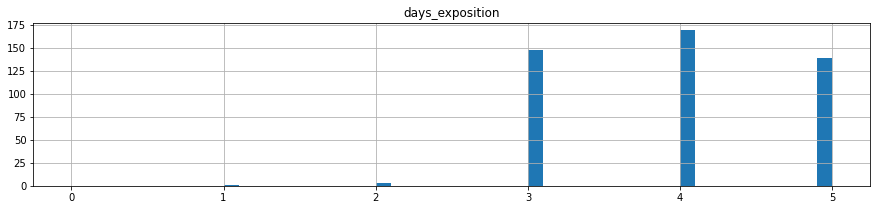

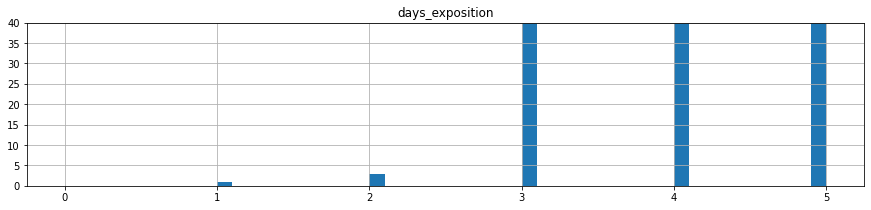

In [166]:
# check
good_data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

good_data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [167]:
  (
        data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
              'floor', 'floors_total']]
        .apply (['count', 'min', 'max', 'median'])   
        .style.format("{:,.2f}")
    )

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","23,699.00","20,518.00","23,699.00","21,796.00","21,421.00","23,699.00","23,699.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,10.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.60,95.00,"4,650,000.00",30.00,9.10,4.00,9.00


In [168]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [169]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


In [170]:
# check
import matplotlib.pyplot as plt

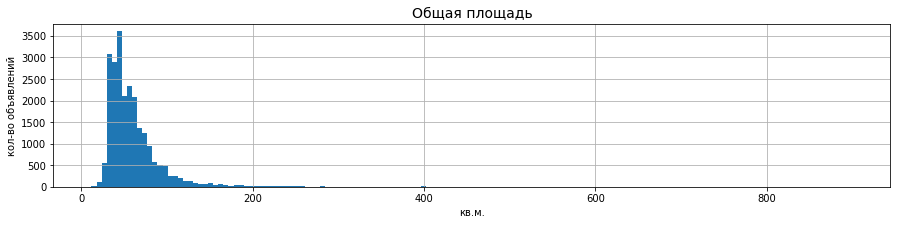

In [171]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

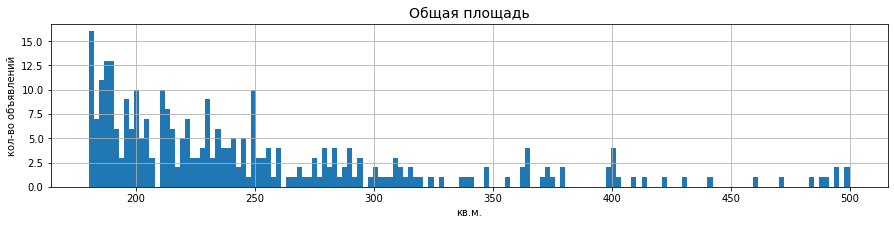

In [172]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

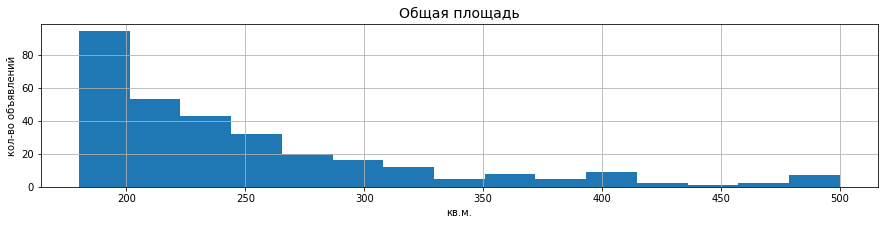

In [173]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

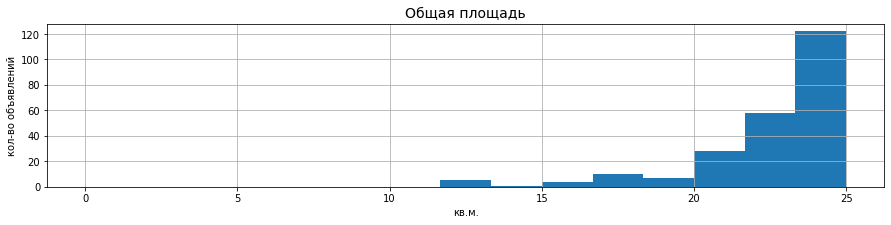

In [174]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

In [175]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.40,3.00,"562,188.00",10.00,3.77,1.00,2.00
0.01,1.00,25.20,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.60,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,197.21,3.60,"1,068.66","36,000,000.00",120.00,35.09,23.00,26.00
0.9988,8.00,380.00,4.40,"1,369.90","124,772,448.00",219.69,60.00,26.00,35.00


#### Изучим, как быстро продавались квартиры

In [176]:
good_data['days_exposition'].describe()

count    19139.000000
mean       178.725273
std        217.035934
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

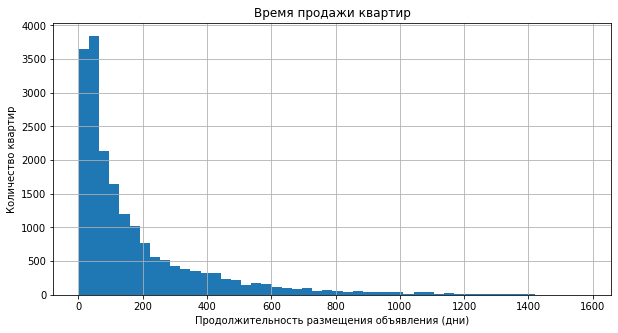

In [177]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['days_exposition'], bins =50)
plt.grid(True)
plt.xlabel('Продолжительность размещения объявления (дни)')
plt.ylabel('Количество квартир')
plt.title('Время продажи квартир');

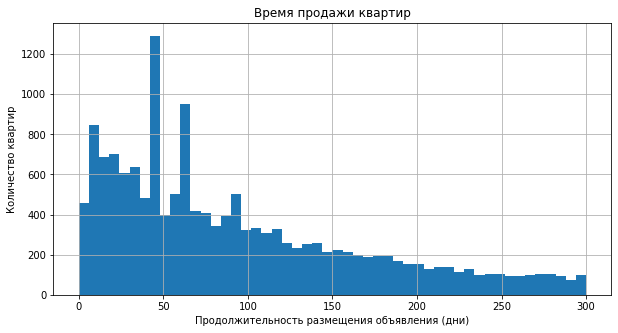

In [178]:
#рассмотрим график более подробно
plt.figure(figsize=(10, 5))
plt.hist(good_data['days_exposition'], bins=50, range=(0,300))
plt.grid(True)
plt.xlabel('Продолжительность размещения объявления (дни)')
plt.ylabel('Количество квартир')
plt.title('Время продажи квартир');

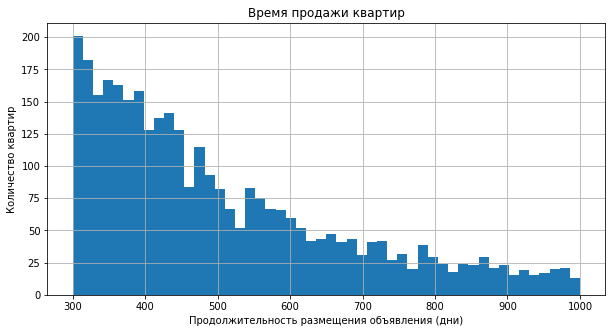

In [179]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['days_exposition'], bins=50, range=(300,1000))
plt.grid(True)
plt.xlabel('Продолжительность размещения объявления (дни)')
plt.ylabel('Количество квартир')
plt.title('Время продажи квартир');

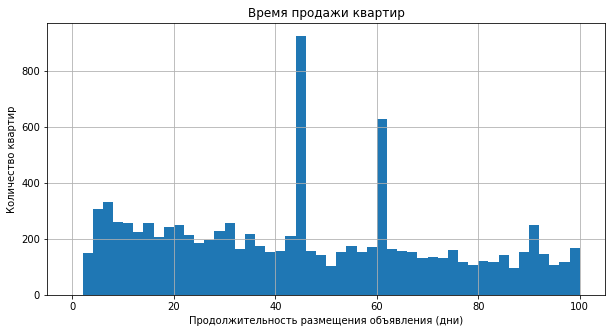

In [180]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['days_exposition'], bins=50, range=(0,100))
plt.grid(True)
plt.xlabel('Продолжительность размещения объявления (дни)')
plt.ylabel('Количество квартир')
plt.title('Время продажи квартир');

In [181]:
print(len(good_data.query('days_exposition > 1300')))
print((len(good_data.query('days_exposition > 1300')))/(len(good_data['days_exposition'])))

42
0.0019090041361756285


Объекты, которые находились в продаже больше 900 дней составляют около 2% от общего числа объектов, и эти данные можно временно исключить из анализа.

In [182]:
#days_exposition_sorted = data.query('days_exposition < 900')

#### check nan

In [183]:
# check
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22001 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22001 non-null  int64         
 1   last_price              22001 non-null  float64       
 2   total_area              22001 non-null  float64       
 3   first_day_exposition    22001 non-null  datetime64[ns]
 4   rooms                   22001 non-null  int64         
 5   ceiling_height          22001 non-null  float64       
 6   floors_total            22001 non-null  int64         
 7   living_area             20262 non-null  float64       
 8   floor                   22001 non-null  float64       
 9   is_apartment            22001 non-null  bool          
 10  studio                  22001 non-null  bool          
 11  open_plan               22001 non-null  bool          
 12  kitchen_area            20083 non-null  float6

In [184]:
#good_data = good_data[good_data['days_exposition'] <= 1300]

In [185]:
days_exposition_sorted = (good_data['days_exposition'] <= 1300) | (good_data['days_exposition'].isna())

In [186]:
good_data = good_data[days_exposition_sorted]

In [187]:
# check
good_data.shape[0]

21959

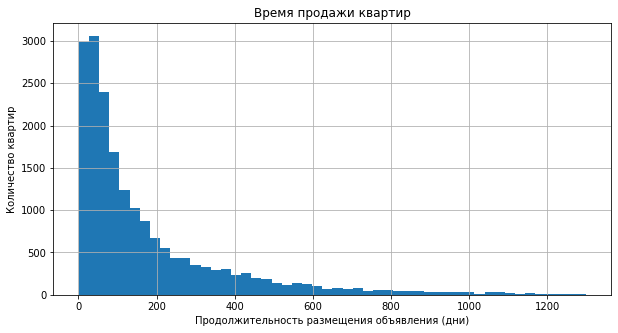

In [188]:
plt.figure(figsize=(10, 5))
plt.hist(good_data['days_exposition'], bins=50)
plt.grid(True)
plt.xlabel('Продолжительность размещения объявления (дни)')
plt.ylabel('Количество квартир')
plt.title('Время продажи квартир');

Среднее время продажи составляет 178 дней, а медианное - 95 дней. Медиана менее подвержена аномальным значениям и выбросам, поэтому это значение можно считать более правдивым. Чаще всего квартиры продавались за примерно 50 дней (около 2х месяцев). Далее идёт срок продади в 60 дней и 90 дней. Есть и объекты, которые не могут продать несколько лет.
Короткими можно считать продажи, которые были осуществлены быстрее 45 дней (1-й квартиль), а долгими - дольше 232 дней (3-й квартиль). Пиковые значения в районе 45, 60 и 90 дней могут быть объяснены техническими моментами размещения объявлений (именно на такие сроки объявления можно разместить на сайте).
На скорость продажи объекта могут повлиять такие факторы, как: близость к центру, состояние квартиры, инфраструктура, тип и этажность дома.

In [189]:
average_selling = good_data.groupby('year')['days_exposition'].mean().reset_index()
average_selling.columns = ['year', 'average_days_exposition']
print(average_selling)

   year  average_days_exposition
0  2014               829.988889
1  2015               622.682683
2  2016               317.937820
3  2017               157.928873
4  2018                93.827615
5  2019                30.762367


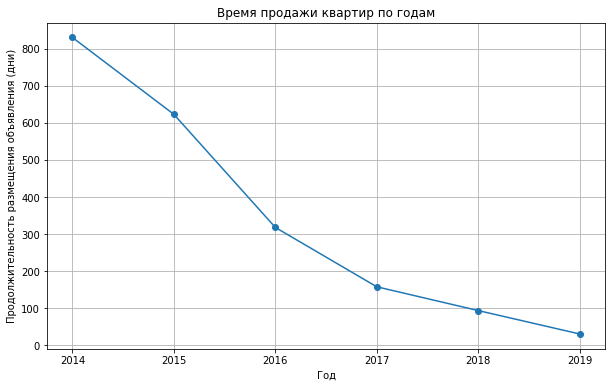

In [190]:
plt.figure(figsize=(10, 6))
plt.plot(average_selling['year'], average_selling['average_days_exposition'], marker='o')
plt.xlabel('Год')
plt.ylabel('Продолжительность размещения объявления (дни)')
plt.title('Время продажи квартир по годам')
plt.grid(True) 
plt.show()

В 2014 году квартиры продавались дольше всего, а в 2019 году - быстрее всего. В рассматриваемый период наблюдается резкое уменьшение времени продажи. Это может говорить об увеличении спроса на недвижимость и улучшении ситуации на рынке. 

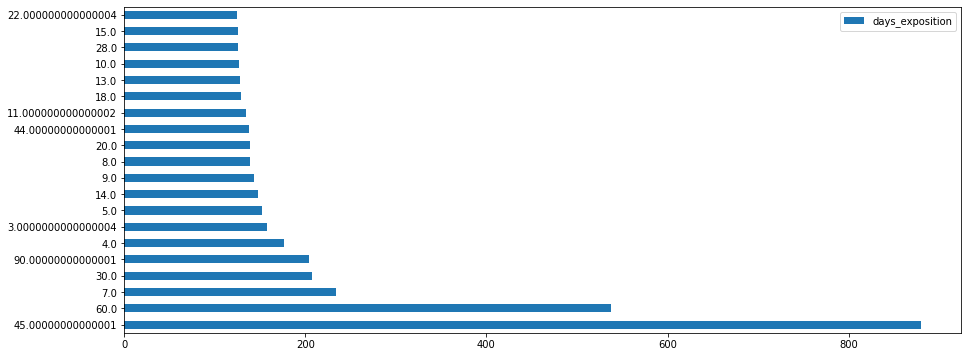

In [191]:
# check
# Моды на сырых данных

try:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

In [192]:
days_exposition_sorted_new = good_data[good_data['days_exposition'] == 45]
print(days_exposition_sorted_new)

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, distance_from_city, locality_type, duplicated, price_per_square_meter, weekday, month, year, floor_number, city_centres_km]
Index: []

[0 rows x 31 columns]


#### **Изучим, какие факторы влияли на стоимость объекта**

*Зависимость цены от общей площади*

In [193]:
#print(last_price_sorted['last_price'].corr(good_data['total_area']).round(2))

In [194]:
print(good_data['last_price'].corr(good_data['total_area']).round(2))

0.78


Между стоимостью объекта и общей площадью есть сильная связь.

*Зависимость цены от жилой площади*

In [195]:
#print(last_price_sorted['last_price'].corr(living_area_sorted['living_area']).round(2))

In [196]:
print(good_data['last_price'].corr(good_data['living_area']).round(2))

0.68


Между стоимостью объекта и жилой площадью есть достаточно сильная связь.

*Зависимость цены от площади кухни*

In [197]:
#print(last_price_sorted['last_price'].corr(kitchen_area_sorted['kitchen_area']).round(2))

In [198]:
print(good_data['last_price'].corr(good_data['kitchen_area']).round(2))

0.59


Между стоимостью объекта и площадью кухни есть связь, но не такая сильная.

*Зависимость цены от количества комнат*

In [199]:
#print(last_price_sorted['last_price'].corr(rooms_sorted['rooms']).round(2))

In [200]:
print(good_data['last_price'].corr(good_data['rooms']).round(2))

0.51


Между стоимостью объекта и количеством комнат есть связь, но не такая сильная.

Коэффициент корреляции для параметров день, месяц и год размещения объявления - неэффективно, так как это нелинейные параметры.

***Вывод:***

Сильная зависимость: стоимость от общей площади, жилой площади, 
Средняя зависимость: стоимость от площади кухни и количества комнат  
Нет зависимости: стоимость от дня, месяца и года публикации объявления, зависимость от года публикации - отрицательная.  

In [201]:
#last_price_sorted.plot(x='total_area', y='last_price', style= 'o', xlim=(0, 120), ylim=(0,15000000), grid= True, figsize=(10,7))
#plt.title('Зависимость цены от общей площади');

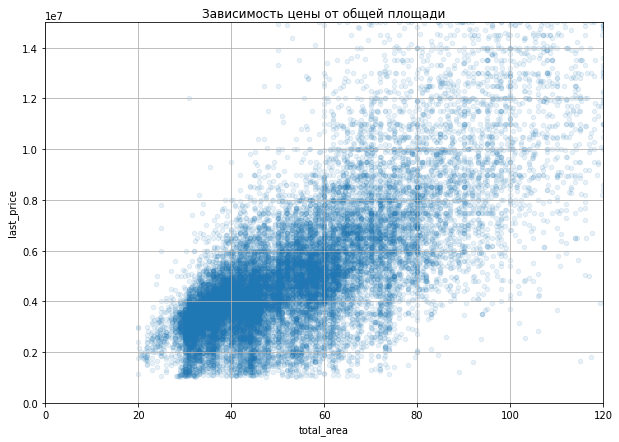

In [202]:
good_data.plot(x='total_area', y='last_price', kind='scatter',
          xlim=(0, 120), ylim=(0,15000000), grid= True, figsize=(10,7), alpha=0.1)
plt.title('Зависимость цены от общей площади'); 

In [203]:
#last_price_sorted.plot(x='living_area', y='last_price', style= 'o', xlim=(0, 80), ylim=(0,15000000), grid= True, figsize=(7,7))
#plt.title('Зависимость цены от жилой площади');

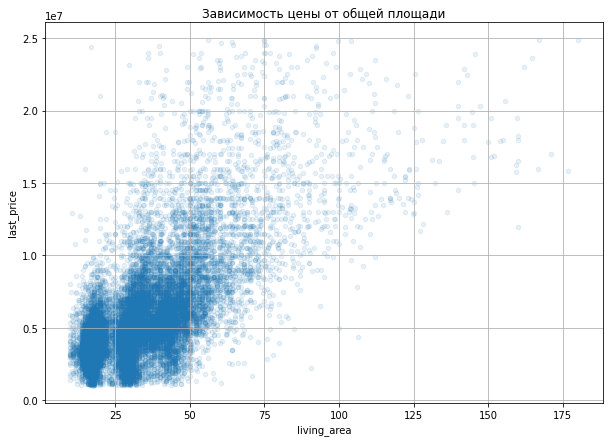

In [204]:
good_data.plot(x='living_area', y='last_price', kind='scatter', grid= True, figsize=(10,7), alpha=0.1)
plt.title('Зависимость цены от общей площади'); 

In [205]:
#data.plot(x='kitchen_area', y='last_price', style= 'o', xlim=(0, 25), ylim=(0,15000000), grid= True, figsize=(7,7))
#plt.title('Зависимость цены от площади кухни')

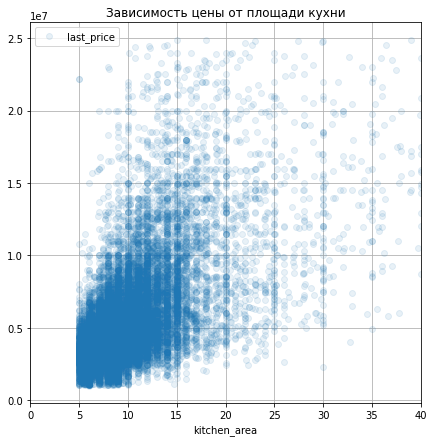

In [206]:
good_data.plot(x='kitchen_area', y='last_price', style= 'o',xlim=(0, 40), grid= True, figsize=(7,7), alpha=0.1)
plt.title('Зависимость цены от площади кухни');

Text(0.5, 1.0, 'Зависимость цены от количества комнат')

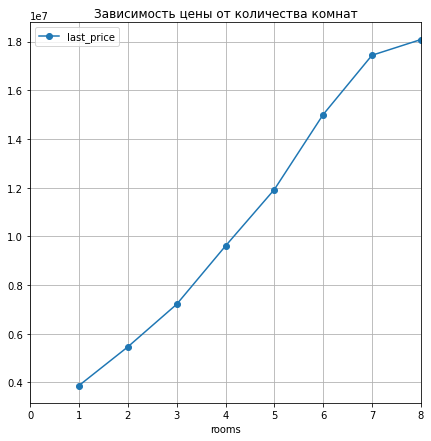

In [207]:
good_data.pivot_table(index='rooms', values = 'last_price').plot(style= 'o-',xlim=(0, 8), grid= True, figsize=(7,7))
plt.title('Зависимость цены от количества комнат')

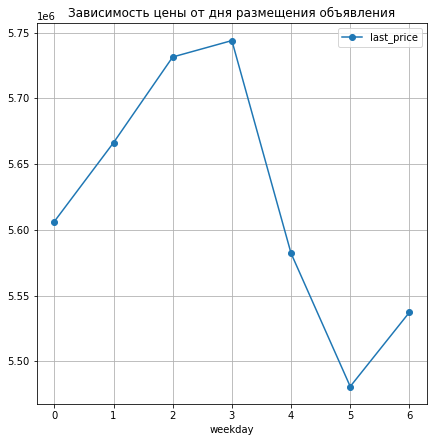

In [208]:
good_data.pivot_table(index='weekday', values = 'last_price').plot(style= 'o-', grid= True, figsize=(7,7))
plt.title('Зависимость цены от дня размещения объявления');

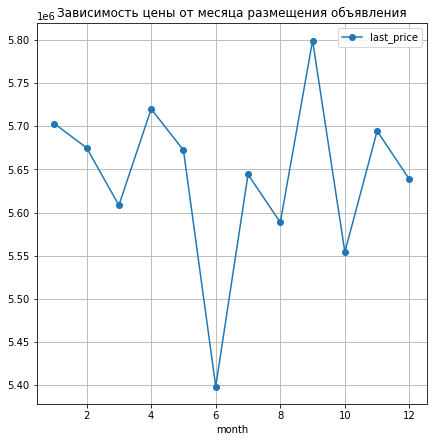

In [209]:
good_data.pivot_table(index='month', values = 'last_price').plot(style= 'o-', grid= True, figsize=(7,7))
plt.title('Зависимость цены от месяца размещения объявления');

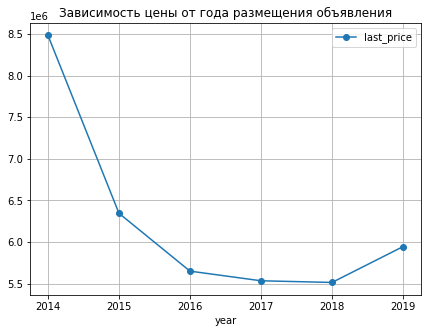

In [210]:
good_data.pivot_table(index='year', values = 'last_price').plot(style= 'o-', grid= True, figsize=(7,5))
plt.title('Зависимость цены от года размещения объявления');

# ***Вывод:***

Предыдущий вывод на основе корреляции подтвердился:   
* между общей площадью, жилой площадью, площадью кухни и стоимостью объекта наблюдается сильная зависимость ( с увеличением площадей увеличивается и цена);  
* с увеличением количества комнат увеличивается и стоимость объекта;
* самыми дорогимм оказались объекты на последнем этаже, самыми дешёвыми - на первом;  
* между днём, месяцем публикации объявления и стоимостью объекта прямой зависимости не наблюдается. Если смотреть на зависимость стоимости от года подачи объявления, то можно увидеть, что начиная с 2014 и до 2018 года стоимость линейно уменьшалась. И только в 2019 году начался подъём стоимости. 

In [211]:
price_change = good_data.pivot_table(
    index='year',
    values=['last_price', 'total_area', 'rooms'],
    aggfunc={'last_price': 'mean', 'total_area': 'mean', 'rooms': 'count'}
)
price_change.columns = ['avg_price','count','avg_area' ]
display(price_change)

,avg_price,count,avg_area
year,,,
2014,8.483643e+06,103,75.475049
2015,6.345177e+06,1054,65.048975
2016,5.650011e+06,2595,59.233653
2017,5.534078e+06,7584,57.764888
2018,5.514071e+06,7936,56.387296
2019,5.944710e+06,2687,56.603089


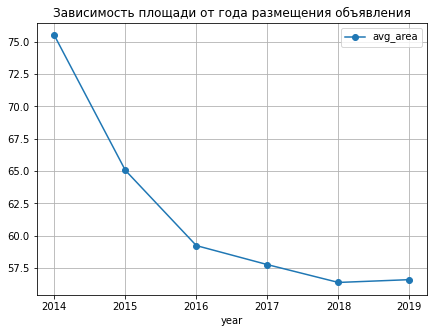

In [212]:
price_change.pivot_table(index='year', values = 'avg_area').plot(style= 'o-', grid= True, figsize=(7,5))
plt.title('Зависимость площади от года размещения объявления');

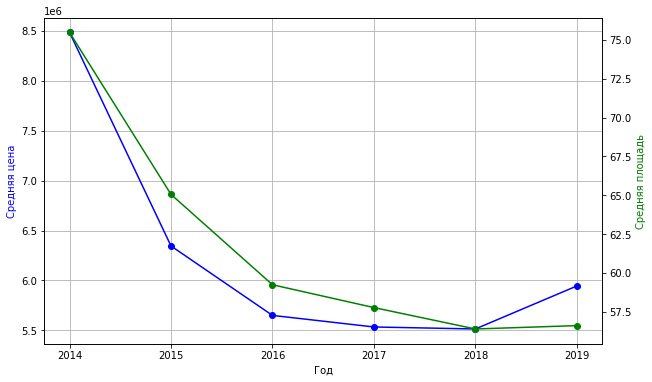

In [213]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(price_change.index, price_change['avg_price'], color='blue', label='Средняя цена', marker='o')
ax1.set_xlabel('Год')
ax1.set_ylabel('Средняя цена', color='blue')
plt.grid(True)
# Создадим второй график на той же оси для средней площади
ax2 = ax1.twinx()
ax2.plot(price_change.index, price_change['avg_area'], color='green', label='Средняя площадь', marker='o')
ax2.set_ylabel('Средняя площадь', color='green');

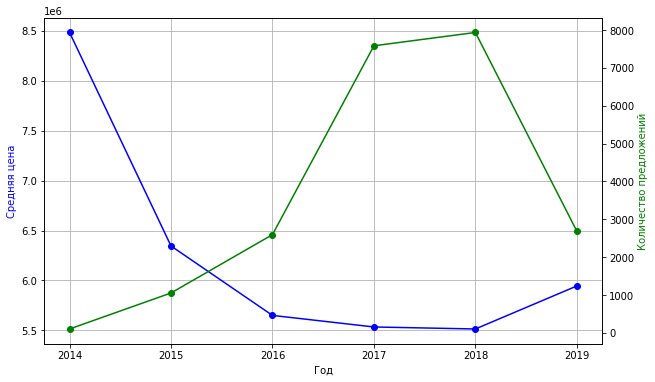

In [214]:
ig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(price_change.index, price_change['avg_price'], color='blue', label='Средняя цена', marker='o')
ax1.set_xlabel('Год')
ax1.set_ylabel('Средняя цена', color='blue')
plt.grid(True)

# Создадим второй график на той же оси для количества записей
ax2 = ax1.twinx()
ax2.plot(price_change.index, price_change['count'], color='green', label='Средняя площадь', marker='o')
ax2.set_ylabel('Количество предложений', color='green');


Из графиков видно, что значения средней площади менялись практически идентично в течение всего времени. Грфики имеют похожую форму, и можно сказать, что с уменьшением площади уменьшалась и средняя цена объекта. Противоположную тенденцию имеют графики количества записей и средней цены. С 2014 года и до 2018 количество предложений росло, а средняя цена уменьшалась. В 2018 году количество предлагаемых объектов начало резко снижаться, а средняя цена наоборот начала расти.

#### Найдём среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [215]:
price= data.pivot_table(index= 'locality_name', values = 'last_price', aggfunc='count')

In [216]:
price = price.sort_values(by='last_price', ascending=False).head(10)

In [217]:
price = price.rename(columns={'last_price': 'count'})

In [218]:
price['price_per_square_meter'] = data.pivot_table(index= 'locality_name', values = 'price_per_square_meter').round(2)

In [219]:
print(price)

                   count  price_per_square_meter
locality_name                                   
Санкт-Петербург    15721               114849.01
посёлок Мурино       556                85681.76
посёлок Шушары       440                78677.36
Всеволожск           398                68654.47
Пушкин               369               103125.82
Колпино              338                75424.58
посёлок Парголово    327                90175.91
Гатчина              307                68746.15
деревня Кудрово      299                92473.55
Выборг               237                58141.91


In [220]:
price = price.sort_values(by='price_per_square_meter', ascending=True).head(10)

In [221]:
price = price.reset_index()

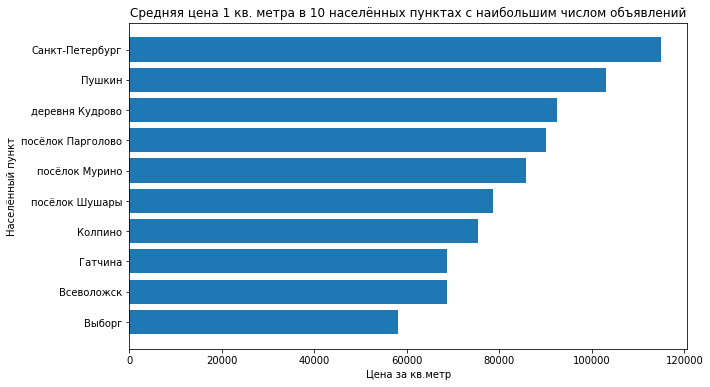

In [222]:
plt.figure(figsize=(10, 6))
plt.barh(price['locality_name'], price['price_per_square_meter'])
plt.xlabel('Цена за кв.метр')
plt.ylabel('Населённый пункт')
plt.title('Средняя цена 1 кв. метра в 10 населённых пунктах с наибольшим числом объявлений');

# ***Вывод:***

Дороже всего квадратный метр стоит в Санкт-Петербурге - средняя цена составляет 114 849 рублей. Далее идёт город Пушкин - высокую стоимость квартир можно объяснить близостью к Санкт-Петербургу, хорошей траспортной доступностью, количеством парков, спокойной атмосферой. Далее идут населённые пункты, которые находятся в непосредственной близости от Санкт-Петербурга, имеющие развитую инфпвструктуру, новые жилые комплексы и более тихую обстановку. Цена кв. метра в Гатчине и Всеволжске практически равны. Замыкает топ-10 самых дорогих населённых пунктов Выборг - там стоимость квадратного метра в среднем составляет 58 141 рублей.

#### Вычислим цену каждого километра до центра у квартир в Санкт-Петербурге

In [223]:
flats_spb = data.query('locality_name == "Санкт-Петербург"')

In [224]:
flats_spb_table=flats_spb.pivot_table(index='city_centres_km', values = 'last_price')

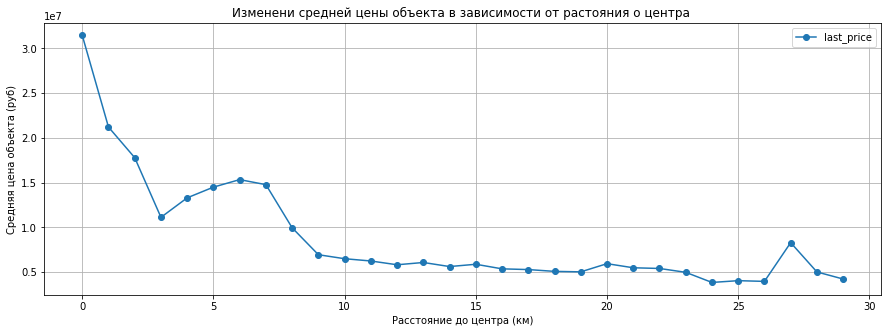

In [225]:
flats_spb_table.plot(style= 'o-', 
               
#                xlim=(0, 14), 
# закомментировал твой код               
               grid= True, figsize=(15,5))
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена объекта (руб)')
plt.title('Изменени средней цены объекта в зависимости от растояния о центра ');

In [226]:
#Доля квартир на м3 километре
flats_3km = data.query('city_centres_km ==3 and locality_name == "Санкт-Петербург"')
flats_3km_number = flats_3km['floor_number'].value_counts()
print(flats_3km_number)
share_3km = flats_3km_number / flats_3km_number.sum()
display(share_3km)

другой       216
последний     79
первый        55
Name: floor_number, dtype: int64


другой       0.617143
последний    0.225714
первый       0.157143
Name: floor_number, dtype: float64

In [227]:
#Доля квартир на 5 километре
flats_5km = data.query('city_centres_km ==5 and locality_name == "Санкт-Петербург"')
flats_5km_number = flats_5km['floor_number'].value_counts()
print(flats_5km_number)
share_5km = flats_5km_number / flats_5km_number.sum()
display(share_5km)
#print(flats_5km['floor_number'].value_counts())

другой       693
последний    145
первый        82
Name: floor_number, dtype: int64


другой       0.753261
последний    0.157609
первый       0.089130
Name: floor_number, dtype: float64

floor_number,другой,первый,последний
city_centres_km,,,
0.0,0.740741,0.111111,0.148148
1.0,0.635417,0.125000,0.239583
2.0,0.593548,0.145161,0.261290
3.0,0.617143,0.157143,0.225714
4.0,0.718023,0.114826,0.167151
5.0,0.753261,0.089130,0.157609
6.0,0.736246,0.105178,0.158576
7.0,0.776190,0.076190,0.147619
8.0,0.792295,0.088777,0.118928


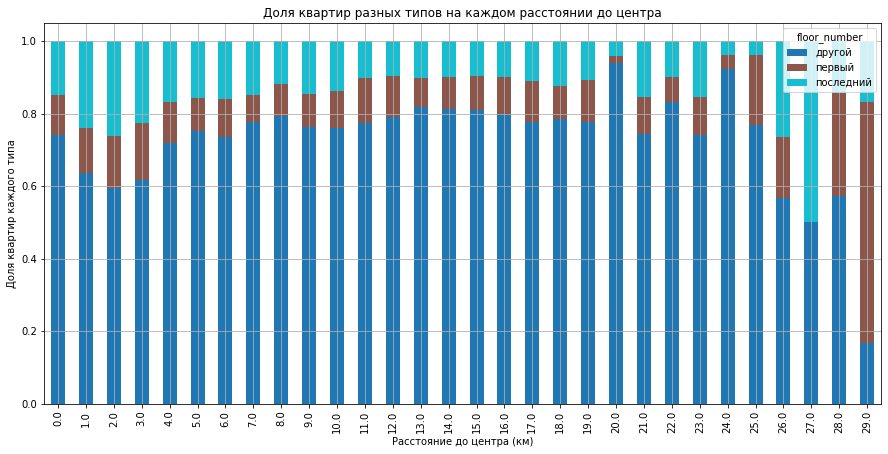

In [228]:
floor_count_by_distance = (
    flats_spb.groupby(['city_centres_km', 'floor_number'])
    .size()
    .unstack()
)

floor_count_by_distance['total'] = floor_count_by_distance.sum(axis=1)

floor_share_by_distance = floor_count_by_distance.div(floor_count_by_distance['total'], axis=0)
floor_share_by_distance = floor_share_by_distance.drop(columns='total')
display(floor_share_by_distance)

floor_share_by_distance.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab10')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Доля квартир каждого типа')
plt.title('Доля квартир разных типов на каждом расстоянии до центра')
plt.grid(True)
plt.show()

До 3 километра идёт уменьшение доли квартир, находящихся ни на первом, ни на втором этаже. С 3 километра начинается увеличение этой доли, которое продолжается до 5 километра. На 6 километре наблюдается небольшое снижение, но с 7 километра рост снова продолжается.

In [229]:
print(flats_spb.pivot_table(index='city_centres_km', values = 'last_price').sort_values(by='last_price', ascending=False))

                   last_price
city_centres_km              
0.0              3.144912e+07
1.0              2.120672e+07
2.0              1.778832e+07
6.0              1.533842e+07
7.0              1.477515e+07
5.0              1.449912e+07
4.0              1.330428e+07
3.0              1.112658e+07
8.0              9.957717e+06
27.0             8.300000e+06
9.0              6.950659e+06
10.0             6.504119e+06
11.0             6.250815e+06
13.0             6.083141e+06
20.0             5.951465e+06
15.0             5.884751e+06
12.0             5.828545e+06
14.0             5.629101e+06
21.0             5.493469e+06
22.0             5.415524e+06
16.0             5.373131e+06
17.0             5.292395e+06
18.0             5.091331e+06
19.0             5.037675e+06
28.0             5.026429e+06
23.0             4.985376e+06
29.0             4.236667e+06
25.0             4.052840e+06
26.0             3.973013e+06
24.0             3.854430e+06


In [230]:
flats_spb = flats_spb.reset_index()

In [231]:
display(flats_spb.groupby('city_centres_km')['rooms'].count())

city_centres_km
0.0       27
1.0      192
2.0      310
3.0      350
4.0      688
5.0      920
6.0      618
7.0      420
8.0      597
9.0      593
10.0     719
11.0    1178
12.0    1605
13.0    1457
14.0    1279
15.0    1568
16.0    1265
17.0     883
18.0     261
19.0     157
20.0      49
21.0     117
22.0     202
23.0      85
24.0      26
25.0      26
26.0      53
27.0       2
28.0       7
29.0       6
Name: rooms, dtype: int64

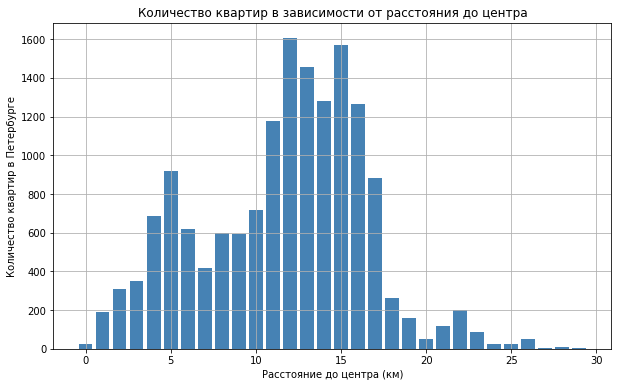

In [232]:
room_count_by_distance = flats_spb.groupby('city_centres_km')['rooms'].count()

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(room_count_by_distance.index, room_count_by_distance.values, color='steelblue')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Количество квартир в Петербурге')
plt.title('Количество квартир в зависимости от расстояния до центра')
plt.grid(True)
plt.show()

In [233]:
#объекты на 27 километре 
flats_27km = data.query('city_centres_km ==27 and locality_name == "Санкт-Петербург"')
flats_27km.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,city_centres_km
count,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.0,...,2.000000,1.0,2.0,0.0,2.000000,2.00000,2.0,2.000000,2.000000,2.0
mean,9.500000,8.300000e+06,53.000000,1.500000,2.865000,3.50000,23.250000,2.500000,16.000000,0.0,...,0.500000,1496.0,0.0,NaN,153.000000,132115.71000,1.0,6.500000,2017.500000,27.0
std,4.949747,8.555992e+06,29.698485,0.707107,0.374767,2.12132,9.545942,0.707107,12.727922,0.0,...,0.707107,NaN,0.0,NaN,35.355339,87402.93778,0.0,6.363961,0.707107,0.0
min,6.000000,2.250000e+06,32.000000,1.000000,2.600000,2.00000,16.500000,2.000000,7.000000,0.0,...,0.000000,1496.0,0.0,NaN,128.000000,70312.50000,1.0,2.000000,2017.000000,27.0
25%,7.750000,5.275000e+06,42.500000,1.250000,2.732500,2.75000,19.875000,2.250000,11.500000,0.0,...,0.250000,1496.0,0.0,NaN,140.500000,101214.10500,1.0,4.250000,2017.250000,27.0
50%,9.500000,8.300000e+06,53.000000,1.500000,2.865000,3.50000,23.250000,2.500000,16.000000,0.0,...,0.500000,1496.0,0.0,NaN,153.000000,132115.71000,1.0,6.500000,2017.500000,27.0
75%,11.250000,1.132500e+07,63.500000,1.750000,2.997500,4.25000,26.625000,2.750000,20.500000,0.0,...,0.750000,1496.0,0.0,NaN,165.500000,163017.31500,1.0,8.750000,2017.750000,27.0
max,13.000000,1.435000e+07,74.000000,2.000000,3.130000,5.00000,30.000000,3.000000,25.000000,0.0,...,1.000000,1496.0,0.0,NaN,178.000000,193918.92000,1.0,11.000000,2018.000000,27.0


На 27 километре расположено всего два объекта. Один из них - 2х этажный дом за 14 миллионов. Это большое значение сильно повлияло на общую картину, что было отображено на графиге появлением пика в этой точке. 

# ***Вывод:***

Как можно было предположить, самая высокая средняя цена оказалась у объектов непосредственно в центре города. Далее, с увеличением расстояния от центра до 8 километров, средняя цена постепенно снижается. После 8 километров зависимость между расстоянием и средней ценой не такая сильная, но самые дешёвые объекты находятся на максимальномм расстоянии от центра (больше 20 километров).

### Напишите общий вывод

Был проведён анализ объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, и установлены параметры, влияющие на цену объктов.  

При анализе данных были проделаны следущие шаги:
1. Был загружен файл с данными и изучена общая информация о датафрейме.
* Было установлено, что датафрейм содерджит 23 699 значений, во многих столбцах есть пропущенные значения, есть и аномальныее значения выбивающиеся из общего ряда. Явных дубликатов обнаружено не было.  

2. Была проведена предобработка данных: 
   * был переименован столбец 'cityCenters_nearest' в'city_centers_nearest', что более соотвествует языку Python;
   * было найдено количество пропусков в столбцах датафрема;
   * пропуски были обработаны, где это было возможным;
   * данные были приведены в нужный фомат и округлены;
   * были сделаны выводы о возможных причинах появления пропусков;
   * были  обработаны неявные дубликаты в списке населённых пунктов. 
   

3. В таблицу были добавлены следующие столбцы: 

   * *price_per_square_meter* -   цена за 1 кв.метр  
   * *weekday* -   день подачи объявления  
   * *month* -   месяц подачи объявления  
   * *year* -   год подачи объявления  
   * *floor_number* -   тип этажа  
   * *city_centres_km* -   расстояние до центра города (км)
   

4. Был проведён исследовательский анализ данных:  
   * Изучены параметры: 
   
    *общая площадь;*  
    *жилая площадь;*  
    *площадь кухни;*     
    *цена объекта;*    
    *количество комнат;*    
    *высота потолков;*    
    *тип этажа квартиры («первый», «последний», «другой»);*    
    *общее количество этажей в доме;*    
    *расстояние до центра города (м);*    
    *расстояние до ближайшего парка*
    
    
   * По данным параметрам были проведены исследования и построены гистограмы.  
   
   
   * Были обработаны аномальные значения встолбцах 'total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms','ceiling_height', 'floors_total', 'days_exposition':

     - Из столбца 'total_area' были исключены объекты с общей площадью меньше 20 и больше 250 кв. метров.
     - Из столбца 'living_area' были исключены объекты с жилой площадью меньше 13 и больше 180 кв. метров.
     - Из столбца 'kitchen_area' были исключены объекты с площадью кухни меньше 5 и больше 40 кв. метров.
     - Из столбца 'last_price' были исключены объекты с ценой меньше 1 и больше 25 миллионов рублей.
     - Из столбца 'rooms' были исключены объекты, в которых больше 8 комнат, и в которых меньше 1 комнаты.
     - Из столбца 'ceiling_height' были исключены объекты с высотой потолков менее 2,5 и более 5 метров.
     - Из столбца 'floors_total' были исключены объекты, которые находятся в домах, имеющих более 27 этажей.
     - Из столбца 'days_exposition' были исключены объекты, которые продавались более 800 дней.
     
     

   * Было изучено, как быстро продавались сквартиры, и сделан вывод о том, какие продажи можно считать быстрыми, а какие - медленными.
   * Была изучена зависимость стоимости продажи квартиры от изученных параметров, и сделаны соответствующие выводы.
   * Были выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
   * Было рассмотрено, как стоимость объекта зависитт от расстояния до центра города.

Проанализировав все данные можно сделать вывод, что: 
* Больше всего объявлений предлагают 1 или 2-комнатная квартира, чуть реже 3-комнатную. Предложений квартир с большим количеством комнат не так много. Чаще всего объекты предлагаются в 5-ти этажном доме, чуть реже в 9-ти этажных. Далее по популярности следуют объекты в новостройках - в 16 и 25-ти этажных домах. Больше всего предложений квартир, расположенных ни на первом, ни на последнем этаже. В среднем квартиры имеют площадь от 30 до 70 кв. метров, жилую площадь - от 15 до 65 кв.метров и площадь кухни  от 6 до 18 кв.метров. Высота потолка в квартирах в среднем составляет около 2,6 метров, но также достаточно много предложнений с высотой потолков 3 метра. Больше всего предложений квартир, расположенных в спальных районах (на расстоянии около 15 километров от центра города) и близко к центру (около 5 километров от центра). Большое количество объектов находятся рядом с парком. Диапазон цен большинства предложений срставляет около 3 200 000 7 500 000 рублей.

* Цена объекта в большей степени зависит от площади (чем больше площадь, тем выше цена), количества комнат (чем их больще, тем выше цена) и отдалённости от центра (квартиры в центре ожидаемо дороже).


* среднее время продажи составляет 178 дней, а медианное - 95 дней. Медиана менее подвержена аномальным значениям и выбросам, поэтому это значение можно считать более правдивым. Чаще всего объекты продавались за период около 2х месяцев (50-60 дней), так же большое количество объектов продавалось чуть дольше (90 дней). Есть и объекты, которые не могут продать несколько лет.
Короткими можно считать продажи, которые были осуществлены быстрее 45 дней (1,5 месяца), а долгими - дольше 232 дней (более 7 месяцев). Пиковые значения в районе 45, 60 и 90 дней могут быть объяснены техническими моментами размещения объявлений (именно на такие сроки объявления можно разместить на сайте).  
По имеющимся данным можно сказать, что в рассматриваемый период наблюдается резкое уменьшение времени продажи. Это может говорить об увеличении спроса на недвижимость, улучшении работы сервиса продаж, увеличении популярности  сервиса а также и об улучшении ситуации на рынке. Однако, стоит принимать во внимание отсутствие в статистике большого количества непроданных квартир, что имеет большое влияние на точность полученного результата.


* дороже всего квадратный метр стоит в Санкт-Петербурге. Далее идёт город Пушкин и населённые пункты, которые находятся в непосредственной близости от Санкт-Петербурга. Замыкает топ-10 самых дорогих населённых пунктов город Выборг, расположенный на большом расстоянии от Санкт-Петербурга, но обладающий хорошей инфраструктурой и имеющий важное культурное значение.



* в Санкт - Петербугре самая высокая средняя цена оказалась у объектов, расположенных непосредственно в центре города. На расстоянии до 3х километров средняя цена уменьшается, далее  начинает расти до 5-6 километра. Это можно объянить тем, что на 3-м километре доля квартир с более дешёвой стоимостью гораздо выше, чем на 5-ом. Далее, с увеличением расстояния от центра, средняя цена постепенно снижается. После 8 километров зависимость между расстоянием и средней ценой не такая сильная, но самые дешёвые объекты находятся на максимальномм расстоянии от центра (больше 20 километров). Исключение составляет значение на 27 километре. На этом расстоянии от города расположено несколько элитных посёлков, в одном из которых. видимо и продавался один из обектов. На этом километре у нас есть всего два значения, и оба аномальные - аномально большое и маленькое. Этим можно объяснить, что на графике на 27 километре отразилось повышение стоимоси объектов.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    -  выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.